# 라이브러리 불러오기

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
# from statsmodels.formula.api import ols
import warnings 
warnings.filterwarnings("ignore")
import plotly
import plotly.express as px
# import plotly.graph_objs as go
# import plotly.offline as py
# # from prophet import Prophet
# from prophet.plot import plot_plotly, add_changepoints_to_plot
# # 그래프가 노트북에 표시되지 않을 때
# from plotly.offline import iplot, init_notebook_mode
# from plotly.subplots import make_subplots
# init_notebook_mode()
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# 노트북 안에서 그래프를 디스플레이 하겠다는 설정입니다.
%matplotlib inline

# 데이터셋 가져오기

## 도입부 데이터셋

In [2]:
# life_expectancy : 기대수명 데이터
# aging_index : 노령화지수 데이터
# sel_est_pop : 서울시 추계 인구 데이터
# url_health : 노인 건강 만족도 데이터
# url_age : 노인 연령 인지 데이터
life_expectancy = 'https://raw.githubusercontent.com/BDDKID/AIS8/main/used_csv/%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%80%E1%85%AE%E1%86%A8_%E1%84%80%E1%85%B5%E1%84%83%E1%85%A2%E1%84%89%E1%85%AE%E1%84%86%E1%85%A7%E1%86%BC.csv'
aging_index = 'https://raw.githubusercontent.com/BDDKID/AIS8/main/used_csv/%E1%84%8C%E1%85%A5%E1%86%AB%E1%84%80%E1%85%AE%E1%86%A8_%E1%84%82%E1%85%A9%E1%84%85%E1%85%A7%E1%86%BC%E1%84%92%E1%85%AA%E1%84%8C%E1%85%B5%E1%84%89%E1%85%AE.csv'
sel_est_pop = 'https://raw.githubusercontent.com/BDDKID/AIS8/main/used_csv/%E1%84%89%E1%85%A5%E1%84%8B%E1%85%AE%E1%86%AF%E1%84%89%E1%85%B5_%E1%84%8E%E1%85%AE%E1%84%80%E1%85%A8%E1%84%8B%E1%85%B5%E1%86%AB%E1%84%80%E1%85%AE.csv'
url_health = 'https://raw.githubusercontent.com/everyshayday/AS8/main/%EB%85%B8%EC%9D%B8%EC%9D%98_%EA%B1%B4%EA%B0%95%EC%83%81%ED%83%9C_%EB%A7%8C%EC%A1%B1%EB%8F%84.csv'
url_age = 'https://raw.githubusercontent.com/everyshayday/AS8/main/%EB%85%B8%EC%9D%B8%EC%9D%98_%EB%85%B8%EC%9D%B8%EC%97%B0%EB%A0%B9%EC%97%90_%EB%8C%80%ED%95%9C_%EC%9D%B8%EC%A7%80.csv'

## 지하철 운영적자와 노인의 관계

### 지하철 운영 적자와 고령 인구 수의 증가, 정말 연관이 있을까?

In [3]:
# sel_est_pop : 서울시 추계 인구 데이터
# sel_fr_cost : 무임비용 데이터
# sel_sub_opm : 영업손익 데이터
# sel_sub_expenses : 경비 데이터
# sel_sub_col : 인건비 데이터
sel_est_pop = 'https://raw.githubusercontent.com/BDDKID/AIS8/main/used_csv/%E1%84%89%E1%85%A5%E1%84%8B%E1%85%AE%E1%86%AF%E1%84%89%E1%85%B5_%E1%84%8E%E1%85%AE%E1%84%80%E1%85%A8%E1%84%8B%E1%85%B5%E1%86%AB%E1%84%80%E1%85%AE.csv'
sel_fr_cost = 'https://raw.githubusercontent.com/BDDKID/AIS8/main/used_csv/%E1%84%89%E1%85%A5%E1%84%8B%E1%85%AE%E1%86%AF%E1%84%8C%E1%85%B5%E1%84%92%E1%85%A1%E1%84%8E%E1%85%A5%E1%86%AF_%E1%84%86%E1%85%AE%E1%84%8B%E1%85%B5%E1%86%B7%E1%84%87%E1%85%B5%E1%84%8B%E1%85%AD%E1%86%BC.csv'
sel_sub_opm = 'https://raw.githubusercontent.com/BDDKID/AIS8/main/used_csv/%E1%84%89%E1%85%A5%E1%84%8B%E1%85%AE%E1%86%AF%E1%84%8C%E1%85%B5%E1%84%92%E1%85%A1%E1%84%8E%E1%85%A5%E1%86%AF_%E1%84%8B%E1%85%A7%E1%86%BC%E1%84%8B%E1%85%A5%E1%86%B8%E1%84%89%E1%85%A9%E1%86%AB%E1%84%8B%E1%85%B5%E1%86%A8.csv'
sel_sub_expenses = 'https://raw.githubusercontent.com/BDDKID/AIS8/main/used_csv/%E1%84%89%E1%85%A5%E1%84%8B%E1%85%AE%E1%86%AF%E1%84%8C%E1%85%B5%E1%84%92%E1%85%A1%E1%84%8E%E1%85%A5%E1%86%AF_%E1%84%80%E1%85%A7%E1%86%BC%E1%84%87%E1%85%B5.csv'
sel_sub_col = 'https://raw.githubusercontent.com/BDDKID/AIS8/main/used_csv/%E1%84%89%E1%85%A5%E1%84%8B%E1%85%AE%E1%86%AF%E1%84%8C%E1%85%B5%E1%84%92%E1%85%A1%E1%84%8E%E1%85%A5%E1%86%AF_%E1%84%8B%E1%85%B5%E1%86%AB%E1%84%80%E1%85%A5%E1%86%AB%E1%84%87%E1%85%B5.csv'

### 고령층 무임수송에 따른 손실이 17~19년에 비해 20년 되레 줄었다… 왜?

In [4]:
# fr_sub: 무임승차 대상별 현황 데이터
# fr_cost : 무임승차 및 무임비용 데이터
# fr_finstate : 운영기관별 손익계산서 데이터
sub_url = "https://raw.githubusercontent.com/gogo-yubari/AI-S8/main/%E1%84%86%E1%85%AE%E1%84%8B%E1%85%B5%E1%86%B7%E1%84%89%E1%85%B3%E1%86%BC%E1%84%8E%E1%85%A1_%E1%84%83%E1%85%A2%E1%84%89%E1%85%A1%E1%86%BC%E1%84%87%E1%85%A7%E1%86%AF_%E1%84%92%E1%85%A7%E1%86%AB%E1%84%92%E1%85%AA%E1%86%BC_20230221145752.csv"
cost_url = "https://raw.githubusercontent.com/gogo-yubari/AI-S8/main/%E1%84%86%E1%85%AE%E1%84%8B%E1%85%B5%E1%86%B7%E1%84%89%E1%85%B3%E1%86%BC%E1%84%8E%E1%85%A1_%E1%84%86%E1%85%B5%E1%86%BE_%E1%84%86%E1%85%AE%E1%84%8B%E1%85%B5%E1%86%B7%E1%84%87%E1%85%B5%E1%84%8B%E1%85%AD%E1%86%BC_20230221165228.csv"
finstate_url = "https://raw.githubusercontent.com/gogo-yubari/AI-S8/main/%E1%84%8B%E1%85%AE%E1%86%AB%E1%84%8B%E1%85%A7%E1%86%BC%E1%84%80%E1%85%B5%E1%84%80%E1%85%AA%E1%86%AB%E1%84%87%E1%85%A7%E1%86%AF_%E1%84%89%E1%85%A9%E1%86%AB%E1%84%8B%E1%85%B5%E1%86%A8%E1%84%80%E1%85%A8%E1%84%89%E1%85%A1%E1%86%AB%E1%84%89%E1%85%A5_20230221145639.csv"

## 노인 연령을 70세로 상향한다면 정말 지하철 적자를 유의미하게 메꿀 수 있을까?

### 노인 연령을 70세로 상향 시 발생하는 이익 계산

In [6]:
# url_pop : 서울시 연도별 연령대별 인구 데이터
# url_pnl : 지하철 운영기관별 손익계산서 데이터

url_pop = "https://raw.githubusercontent.com/everyshayday/AS8/main/seoul_age_population.csv"
url_pnl = "https://raw.githubusercontent.com/everyshayday/AS8/main/%EC%9A%B4%EC%98%81%EA%B8%B0%EA%B4%80%EB%B3%84_%EC%86%90%EC%9D%B5%EA%B3%84%EC%82%B0%EC%84%9C.csv"
url_nomoney = 'https://raw.githubusercontent.com/everyshayday/AS8/main/%EB%AC%B4%EC%9E%84%EC%8A%B9%EC%B0%A8_%EB%8C%80%EC%83%81%EB%B3%84_%ED%98%84%ED%99%A9.csv'
url_deficit = 'https://raw.githubusercontent.com/everyshayday/AS8/main/%EC%8A%B9%EA%B0%9D_1%EC%9D%B8%EB%8B%B9_%EC%9A%B4%EC%9E%84%EC%86%90%EC%8B%A4_%ED%98%84%ED%99%A9.csv'
url_carry = 'https://raw.githubusercontent.com/everyshayday/AS8/main/%EC%8A%B9%EC%B0%A8_%EB%B0%8F_%EC%88%98%EC%86%A1%EC%9D%B8%EC%9B%90.csv'

### 향후 5년간(22-26년) 무임승차 연령을 상향한다면 얼마나 수익이 생길까? 과연 유의미할까?

In [6]:
# url_cpi : 물가상승지수 데이터
# url_pop : 노인 인구수 변화 데이터 
# url : 인구수 데이터
# url_carry : 승차인원 데이터
url_cpi = 'https://raw.githubusercontent.com/JounKK/AIS8_task/main/mid_%E1%84%8B%E1%85%A7%E1%86%AB%E1%84%83%E1%85%A9%E1%84%87%E1%85%A7%E1%86%AF_%E1%84%8C%E1%85%B5%E1%84%8E%E1%85%AE%E1%86%AF%E1%84%86%E1%85%A9%E1%86%A8%E1%84%8C%E1%85%A5%E1%86%A8%E1%84%87%E1%85%A7%E1%86%AF_%E1%84%89%E1%85%A9%E1%84%87%E1%85%B5%E1%84%8C%E1%85%A1%E1%84%86%E1%85%AE%E1%86%AF%E1%84%80%E1%85%A1%E1%84%8C%E1%85%B5%E1%84%89%E1%85%AE_%E1%84%89%E1%85%A5%E1%84%8B%E1%85%AE%E1%86%AF%E1%84%90%E1%85%B3%E1%86%A8%E1%84%87%E1%85%A7%E1%86%AF%E1%84%89%E1%85%B5.csv'
url_pop = 'https://raw.githubusercontent.com/JounKK/AIS8_task/main/mid_%E1%84%89%E1%85%A5%E1%86%BC_%E1%84%86%E1%85%B5%E1%86%BE_%E1%84%8B%E1%85%A7%E1%86%AB%E1%84%85%E1%85%A7%E1%86%BC%E1%84%87%E1%85%A7%E1%86%AF_%E1%84%8E%E1%85%AE%E1%84%80%E1%85%A8%E1%84%8B%E1%85%B5%E1%86%AB%E1%84%80%E1%85%AE_%E1%84%89%E1%85%A5%E1%84%8B%E1%85%AE%E1%86%AF%E1%84%89%E1%85%B5.csv'
url = "https://raw.githubusercontent.com/JounKK/AIS8_task/main/mid_%E1%84%89%E1%85%A5%E1%86%BC_%E1%84%86%E1%85%B5%E1%86%BE_%E1%84%8B%E1%85%A7%E1%86%AB%E1%84%85%E1%85%A7%E1%86%BC%E1%84%87%E1%85%A7%E1%86%AF_%E1%84%8E%E1%85%AE%E1%84%80%E1%85%A8%E1%84%8B%E1%85%B5%E1%86%AB%E1%84%80%E1%85%AE_1722.csv"
url_carry = 'https://raw.githubusercontent.com/everyshayday/AS8/main/%EC%8A%B9%EC%B0%A8_%EB%B0%8F_%EC%88%98%EC%86%A1%EC%9D%B8%EC%9B%90.csv'
url_nomoney = 'https://raw.githubusercontent.com/everyshayday/AS8/main/%EB%AC%B4%EC%9E%84%EC%8A%B9%EC%B0%A8_%EB%8C%80%EC%83%81%EB%B3%84_%ED%98%84%ED%99%A9.csv'

## 지하철 운영의 실질적인 문제

### 지하철 운영 적자의 진짜 원인은?

In [103]:
# url_2017 ~ 2021 : 서울 교통공사 손익계산서 데이터
url_2021 = "https://raw.githubusercontent.com/LimSeungMin/AIS8_task/main/%EB%8F%84%EC%8B%9C%EC%B2%A0%EB%8F%84%EA%B3%B5%EC%82%AC_%EC%86%90%EC%9D%B5%EA%B3%84%EC%82%B0%EC%84%9C_2021.csv"
url_2020 = "https://raw.githubusercontent.com/LimSeungMin/AIS8_task/main/%EB%8F%84%EC%8B%9C%EC%B2%A0%EB%8F%84%EA%B3%B5%EC%82%AC_%EC%9E%AC%EB%AC%B4%EC%83%81%ED%83%9C%ED%91%9C_%EC%86%90%EC%9D%B5%EA%B3%84%EC%82%B0%EC%84%9C_2020.csv"
url_2019 = "https://raw.githubusercontent.com/LimSeungMin/AIS8_task/main/%EB%8F%84%EC%8B%9C%EC%B2%A0%EB%8F%84%EA%B3%B5%EC%82%AC_%EC%9E%AC%EB%AC%B4%EC%83%81%ED%83%9C%ED%91%9C_%EC%86%90%EC%9D%B5%EA%B3%84%EC%82%B0%EC%84%9C_2019.csv"
url_2018 = "https://raw.githubusercontent.com/LimSeungMin/AIS8_task/main/%EB%8F%84%EC%8B%9C%EC%B2%A0%EB%8F%84%EA%B3%B5%EC%82%AC_%EC%9E%AC%EB%AC%B4%EC%83%81%ED%83%9C%ED%91%9C_%EC%86%90%EC%9D%B5%EA%B3%84%EC%82%B0%EC%84%9C_2018.csv"
url_2017 = "https://raw.githubusercontent.com/LimSeungMin/AIS8_task/main/%EB%8F%84%EC%8B%9C%EC%B2%A0%EB%8F%84%EA%B3%B5%EC%82%AC_%EC%9E%AC%EB%AC%B4%EC%83%81%ED%83%9C%ED%91%9C_%EC%86%90%EC%9D%B5%EA%B3%84%EC%82%B0%EC%84%9C_2017.csv"
url_cal = "https://raw.githubusercontent.com/LimSeungMin/AIS8_task/main/%EB%AC%B4%EC%9E%84%EC%8A%B9%EC%B0%A8_%EB%8C%80%EC%83%81%EB%B3%84_%ED%98%84%ED%99%A9_20230222141349.csv"

## 노인 무임승차의 긍정적인 측면

### 노인 무임승차 연령 상향의 불이익

In [100]:
# url_sub : 지역별 65세 인구수
# url_sui : 자살을 생각하는 이유 데이터
# url_suicide : 지역별 실제 자살자 수 데이터
# url_dep : 우울 증세 경험률 데이터
url_sub = 'https://raw.githubusercontent.com/Bae-Sangbin/AISCHOOL8/main/subway_population.csv'
url_sui = 'https://raw.githubusercontent.com/Bae-Sangbin/AISCHOOL8/main/suicide.csv'
url_suicide = 'https://raw.githubusercontent.com/Bae-Sangbin/AISCHOOL8/main/suicide_population.csv'
url_dep = 'https://raw.githubusercontent.com/Bae-Sangbin/AISCHOOL8/main/depression.csv'

# 도입부 파트
- 고령인구와 4세이하 인구 변화추이
- 기대수명과 노령화 지수 추이
- 연도별 노인 건강 만족도 추이
- 노인연령에 대한 인지(2020년)

## 고령인구와 4세이하 인구 변화추이


In [9]:
# 서울인구 추계데이터 불러오기
kid_elder = pd.read_csv(sel_est_pop,encoding='cp949')
kid_elder = kid_elder.drop(columns=['시나리오별(1)','성별(1)','시도별(1)'])

# 고령인구와 유아인구로 데이터셋 분리 하기  
elder = kid_elder.drop(columns='0 - 4세')
kid = kid_elder.drop(columns=['65 - 69세','70 - 74세','75 - 79세','80세이상'])

In [10]:
# 고령인구 데이터프레임 데이터 형식과 컬럼 변경하기
# 65세 이상 인구 합계를 알기위해 새로운 컬럼 생성(65세이상 인구 합계)
elder = elder.astype('int64')
elder['시점'] = elder['시점'].astype('string')
elder['합계'] = elder.sum(axis=1)
elder = elder.drop(columns=['65 - 69세','70 - 74세','75 - 79세','80세이상'])
elder.columns = ['연도','65세이상 인구 합계']
elder

,연도,65세이상 인구 합계
0,2017,1292108
1,2018,1341836
2,2019,1397496
3,2020,1476752
4,2021,1545639
5,2022,1616269
6,2023,1691853
7,2024,1768360
8,2025,1853084
9,2026,1937948


In [11]:
# 유아인구 데이터 프레임 데이터 형식과 컬럼 변경하기
kid.columns = ['연도', '4세 이하 인구 합계']
kid['연도'] = kid['연도'].astype('string')

In [12]:
# 분리했던 고령인구와 유아인구 데이터프레임을 연도를 기준으로 병합
total_kid_elder = pd.merge(kid,elder,how='outer',on='연도')
total_kid_elder['연도'] =total_kid_elder['연도'].astype('int64')
total_kid_elder

,연도,4세 이하 인구 합계,65세이상 인구 합계
0,2017,364416,1292108
1,2018,337490,1341836
2,2019,315996,1397496
3,2020,289085,1476752
4,2021,258523,1545639
5,2022,233066,1616269
6,2023,211978,1691853
7,2024,194295,1768360
8,2025,183670,1853084
9,2026,180529,1937948


In [13]:
# 고령인구와 4세 이하 인구 추이 시각화 하기
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=total_kid_elder['연도'], y=total_kid_elder['4세 이하 인구 합계'], name="4세 이하 인구 합계"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=total_kid_elder['연도'],y=total_kid_elder['65세이상 인구 합계'], name="65세이상 인구 합계"),
    secondary_y=True,
)

fig.update_layout(
    title_text="고령인구와 4세 이하 인구 변화 추이",
    width=900,
    height=500
)

fig.update_xaxes(title_text="연도")

fig.update_yaxes(title_text="<b>4세 이하</b> 인구 합계", secondary_y=False)
fig.update_yaxes(title_text="<b>65세이상</b> 인구 합계", secondary_y=True)

fig.show()

## 기대수명과 노령화 지수 추이


In [14]:
# 기대수명과 노령화 지수 데이터셋 불러오기
life_expect = pd.read_csv(life_expectancy, encoding='cp949')
aging_idx = pd.read_csv(aging_index, encoding='cp949')

In [15]:
# 기대수명 데이터프레임 컬럼 변경
life_expect = life_expect.drop(columns='가정별')
life_expect.columns = ['연도','기대수명']
life_expect

,연도,기대수명
0,2020,83.5
1,2021,83.9
2,2022,84.1
3,2023,84.3
4,2024,84.5
5,2025,84.7
6,2026,84.9
7,2027,85.1
8,2028,85.3
9,2029,85.5


In [16]:
# 노령화 지수 데이터 프레임 컬럼 변경
aging_idx = aging_idx.drop(columns='가정별')
aging_idx.columns = ['연도','노령화지수']

In [17]:
exlife_ai = pd.merge(aging_idx,life_expect,how='outer',on='연도')
exlife_ai

,연도,노령화지수,기대수명
0,2020,129.3,83.5
1,2021,139.5,83.9
2,2022,152.0,84.1
3,2023,167.1,84.3
4,2024,183.2,84.5
5,2025,201.5,84.7
6,2026,223.0,84.9
7,2027,242.6,85.1
8,2028,263.9,85.3
9,2029,281.5,85.5


In [18]:
# 기대수명과 노령화지수 추이 시각화 하기
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=exlife_ai['연도'], y=exlife_ai['기대수명'], name="기대수명"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=exlife_ai['연도'],y=exlife_ai['노령화지수'], name="노령화지수"),
    secondary_y=True,
)

fig.update_layout(
    title_text="기대수명과 노령화지수의 추이",
    width=900,
    height=500
)

fig.update_xaxes(title_text="연도")

fig.update_yaxes(title_text="<b>기대수명</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>노령화지수</b>", secondary_y=True)

fig.show()

## 연도별 노인 건강 만족도 추이


In [19]:
# 노인 건강 만족도 데이터셋 불러오기
hlt = pd.read_csv(url_health, encoding='cp949')
hlt.head()

,시점,특성별(1),특성별(2),매우 만족 (%),만족 (%),그저 그렇다 (%),만족하지 않음 (%),전혀 만족 안함 (%)
0,2011,연령별,65~69세,4.5,38.2,21.6,29.4,6.3
1,2011,연령별,70~74세,2.7,30.9,21.7,36.9,7.8
2,2011,연령별,75~79세,1.9,25.2,21.0,41.6,10.3
3,2011,연령별,80~84세,2.4,25.3,19.0,40.4,12.9
4,2011,연령별,85세 이상,2.1,28.3,23.0,35.8,10.7


In [20]:
# 노인 건강 만족도 데이터의 구조와 형식 확인하기
hlt.shape
hlt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   시점            20 non-null     int64  
 1   특성별(1)        20 non-null     object 
 2   특성별(2)        20 non-null     object 
 3   매우 만족 (%)     20 non-null     float64
 4   만족 (%)        20 non-null     float64
 5   그저 그렇다 (%)    20 non-null     float64
 6   만족하지 않음 (%)   20 non-null     float64
 7   전혀 만족 안함 (%)  20 non-null     float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.4+ KB


In [21]:
# 불필요한 컬럼 제외
hlt = hlt.drop(columns=["특성별(1)"])

In [22]:
# 만족한다고 응답한 항목만 합계
hlt["만족 응답 합계(%)"] = hlt["매우 만족 (%)"] + hlt["만족 (%)"]
hlt.head(2)

,시점,특성별(2),매우 만족 (%),만족 (%),그저 그렇다 (%),만족하지 않음 (%),전혀 만족 안함 (%),만족 응답 합계(%)
0,2011,65~69세,4.5,38.2,21.6,29.4,6.3,42.7
1,2011,70~74세,2.7,30.9,21.7,36.9,7.8,33.6


In [23]:
# 컬럼명 변경

hlt = hlt.rename(columns={"시점":"연도", "특성별(2)":"연령대"})
hlt.head()

,연도,연령대,매우 만족 (%),만족 (%),그저 그렇다 (%),만족하지 않음 (%),전혀 만족 안함 (%),만족 응답 합계(%)
0,2011,65~69세,4.5,38.2,21.6,29.4,6.3,42.7
1,2011,70~74세,2.7,30.9,21.7,36.9,7.8,33.6
2,2011,75~79세,1.9,25.2,21.0,41.6,10.3,27.1
3,2011,80~84세,2.4,25.3,19.0,40.4,12.9,27.7
4,2011,85세 이상,2.1,28.3,23.0,35.8,10.7,30.4


In [24]:
# 노인 건강 만족도 추이 시각화
px.line(hlt, x="연도", y="만족 응답 합계(%)", color="연령대", height=500, width=800,
       title="연도별 노인 건강 만족도 추이", markers=True)

## 노인연령에 대한 인지(2020년)

In [25]:
age = pd.read_csv(url_age, encoding='cp949')
age.head()

,시점,특성별(1),특성별(2),응답자수 (명),60세 미만 (%),60~64세 (%),65~69세 (%),69세 이하 (%),70~74세 (%),75~79세 (%),80세 이상 (%),평균 (세)
0,2011,연령별,65~69세,3149,0.0,3.0,15.3,-,59.5,11.9,10.4,-
1,2011,연령별,70~74세,3225,0.0,3.2,12.8,-,60.4,10.4,13.1,-
2,2011,연령별,75~79세,2389,0.0,4.6,12.1,-,59.1,11.1,13.1,-
3,2011,연령별,80~84세,1159,0.0,2.7,9.7,-,57.5,12.6,17.5,-
4,2011,연령별,85세 이상,611,0.0,3.6,10.5,-,52.7,11.0,22.3,-


In [26]:
# 데이터의 구조와 '시점' 컬럼의 요소 확인하기
age.shape
age["시점"].unique()

array([2011, 2014, 2017, 2020])

In [27]:
#가장 최근 자료만 가져오기

age_2020 = age[age["시점"]==2020]
age_2020

,시점,특성별(1),특성별(2),응답자수 (명),60세 미만 (%),60~64세 (%),65~69세 (%),69세 이하 (%),70~74세 (%),75~79세 (%),80세 이상 (%),평균 (세)
15,2020,연령별,65~69세,3337,-,-,-,24.0,52.3,16.1,7.6,70.8
16,2020,연령별,70~74세,2319,-,-,-,27.2,51.3,15.3,6.2,70.4
17,2020,연령별,75~79세,2262,-,-,-,26.9,53.9,14.2,4.9,70.2
18,2020,연령별,80~84세,1426,-,-,-,24.9,54.2,13.8,7.1,70.4
19,2020,연령별,85세 이상,587,-,-,-,30.3,51.4,11.3,7.1,69.9


In [28]:
# 필요한 컬럼만 가져오기
age_2020_2 = age_2020.iloc[:, [0, 2, 7, 8, 9, 10]]
age_2020_2

,시점,특성별(2),69세 이하 (%),70~74세 (%),75~79세 (%),80세 이상 (%)
15,2020,65~69세,24.0,52.3,16.1,7.6
16,2020,70~74세,27.2,51.3,15.3,6.2
17,2020,75~79세,26.9,53.9,14.2,4.9
18,2020,80~84세,24.9,54.2,13.8,7.1
19,2020,85세 이상,30.3,51.4,11.3,7.1


In [29]:
# 컬럼명 변경
age_2020_2 = age_2020_2.rename(columns={"시점":"연도", "특성별(2)":"연령대"})
age_2020_2

,연도,연령대,69세 이하 (%),70~74세 (%),75~79세 (%),80세 이상 (%)
15,2020,65~69세,24.0,52.3,16.1,7.6
16,2020,70~74세,27.2,51.3,15.3,6.2
17,2020,75~79세,26.9,53.9,14.2,4.9
18,2020,80~84세,24.9,54.2,13.8,7.1
19,2020,85세 이상,30.3,51.4,11.3,7.1


In [30]:
# 데이터 타입 확인하기
age_2020_2.dtypes

연도              int64
연령대            object
69세 이하 (%)     object
70~74세 (%)    float64
75~79세 (%)    float64
80세 이상 (%)    float64
dtype: object

In [31]:
# float형식으로 변환
age_2020_2["69세 이하 (%)"] = age_2020_2["69세 이하 (%)"].astype("float")

In [32]:
# 각 항목의 평균 구하기

age_df = age_2020_2.mean().to_frame()
age_t = age_df.T

In [33]:
# melt를 이용하여 데이터 프레임 구조 변환
age_t = age_t.melt(id_vars=['연도'], var_name='항목', value_name='응답비율')
age_t

,연도,항목,응답비율
0,2020.0,69세 이하 (%),26.66
1,2020.0,70~74세 (%),52.62
2,2020.0,75~79세 (%),14.14
3,2020.0,80세 이상 (%),6.58


In [34]:
# 2020년 노인연령에 대한 인지 시각화
px.bar(age_t, x='항목', y='응답비율', height=500, width=800,
       title="노인연령에 대한 인지 (2020년)", labels={"항목":"노인이라고 인지하는 연령"})

# 지하철 운영적자와 노인의 관계

## 지하철 운영 적자와 고령 인구 수의 증가, 정말 연관이 있을까?

### 연도별 지하철 운영 적자 추이와 고령인구의 상관관계 분석

In [35]:
# 서울시 무임비용 데이터 불러오기
# 필요없는 행과 열 삭제하기
fr_cost= pd.read_csv(sel_fr_cost,encoding = 'cp949')
fr_cost = fr_cost.drop(columns='대상별(1)')
fr_cost = fr_cost.loc[1:]
fr_cost

,시점,서울교통공사,서울메트로 9호선(주),서울교통공사9호선운영부문,우이 신설경전철(주)
1,2017,283059,12182,1379,1494
2,2018,288617,12694,1734,5037
3,2019,304929,13780,4449,5712
4,2020,216135,9829,3406,4500
5,2021,231108,10819,3897,4848


In [36]:
# 무임비용 데이터 프레임 컬럼명과 데이터 형식 변환
col1  = ['연도', '서울교통공사(무임비용(백만원))', '서울메트로 9호선(주)(무임비용(백만원))',
 '서울교통공사9호선운영부문(무임비용(백만원))', '우이 신설경전철(주)(무임비용(백만원))']
fr_cost.columns = col1
fr_cost

fr_cost[['서울교통공사(무임비용(백만원))', '서울메트로 9호선(주)(무임비용(백만원))',
 '서울교통공사9호선운영부문(무임비용(백만원))', '우이 신설경전철(주)(무임비용(백만원))']]=fr_cost[['서울교통공사(무임비용(백만원))',
'서울메트로 9호선(주)(무임비용(백만원))','서울교통공사9호선운영부문(무임비용(백만원))', '우이 신설경전철(주)(무임비용(백만원))']].astype('int64')
fr_cost['연도'] = pd.to_datetime(fr_cost['연도'])
fr_cost

,연도,서울교통공사(무임비용(백만원)),서울메트로 9호선(주)(무임비용(백만원)),서울교통공사9호선운영부문(무임비용(백만원)),우이 신설경전철(주)(무임비용(백만원))
1,2017-01-01,283059,12182,1379,1494
2,2018-01-01,288617,12694,1734,5037
3,2019-01-01,304929,13780,4449,5712
4,2020-01-01,216135,9829,3406,4500
5,2021-01-01,231108,10819,3897,4848


In [37]:
# 무임비용 합계를 구하기 위해 새로운 컬럼 생성
# 인덱스를 초기화 하고 필요없는 컬럼 삭제
fr_cost['전체무임비용(백만원)'] =fr_cost.sum(axis = 1)
fr_cost.reset_index(inplace=True)
fr_cost = fr_cost.drop(columns=['index'])
fr_cost

,연도,서울교통공사(무임비용(백만원)),서울메트로 9호선(주)(무임비용(백만원)),서울교통공사9호선운영부문(무임비용(백만원)),우이 신설경전철(주)(무임비용(백만원)),전체무임비용(백만원)
0,2017-01-01,283059,12182,1379,1494,298114
1,2018-01-01,288617,12694,1734,5037,308082
2,2019-01-01,304929,13780,4449,5712,328870
3,2020-01-01,216135,9829,3406,4500,233870
4,2021-01-01,231108,10819,3897,4848,250672


In [38]:
# 영업손익 데이터 불러오기
# 필요없는 행 삭제하기
opm = pd.read_csv(sel_sub_opm, encoding='cp949')
opm = opm.loc[1:]
opm = opm.astype('int64')

In [39]:
opm['시점'] = ['2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31']
opm['시점'] = pd.to_datetime(opm['시점'])
opm['합계(억원)'] = opm.sum(axis=1)
opm['손실 합계(억원)'] = abs(opm['합계(억원)'])

In [40]:
# 인덱스 초기화 및 필요없는 컬럼 삭제
opm.reset_index(inplace=True)
opm = opm.drop(columns=['index','서울교통공사','서울메트로 9호선㈜','서울교통공사9호선운영부문','우이 신설경전철㈜','합계(억원)'])
opm

,시점,손실 합계(억원)
0,2017-12-31,5511
1,2018-12-31,5694
2,2019-12-31,5638
3,2020-12-31,11414
4,2021-12-31,9896


In [41]:
# 영업비용 : 경비 데이터 불러오기(expenses : 경비)
expenses = pd.read_csv(sel_sub_expenses,encoding='cp949')
expenses = expenses.loc[2:]

In [42]:
# 경비데이터셋 데이터 형식 변경
expenses = expenses.astype('int64')
expenses['시점'] = expenses['시점'].astype('string')


In [43]:
# 전체 경비를 구하기 위해 새로운 컬럼 생성
# 인덱스 초기화 및 필요 없는 컬럼 삭제
expenses['전체 경비(억원)'] = expenses.sum(axis=1)
expenses.reset_index(inplace=True)
expenses = expenses.drop(columns=['index','서울교통공사','서울메트로 9호선㈜','서울교통공사9호선운영부문','우이 신설경전철㈜'])

expenses

,시점,전체 경비(억원)
0,2017,13471
1,2018,14123
2,2019,14348
3,2020,14342
4,2021,14875


In [44]:
# 영업비용 : 인건비 데이터 불러오기(col : cost of labor)
# 필요없는 행 삭제
col = pd.read_csv(sel_sub_col,encoding='cp949')
col = col.loc[2:]

In [45]:
# 데이터프레임 형식 변환
col = col.astype('int64')
col['시점'] = col['시점'].astype('string')

In [46]:
# 전체 인건비를 구하기 위한 새로운 컬럼생성
# 인덱스 초기화 및 필요 없는 컬럼 삭제

col['전체 인건비(억원)'] = col.sum(axis=1)
col.reset_index(inplace=True)
col = col.drop(columns=['index','서울교통공사','서울메트로 9호선㈜','서울교통공사9호선운영부문','우이 신설경전철㈜'])

col

,시점,전체 인건비(억원)
0,2017,13005
1,2018,12862
2,2019,12926
3,2020,14057
4,2021,12815


In [47]:
# 상관꼐수를 구하기위해 데이터를 병합(손실합계, 65세 인구 합계, 전체무임비용, 전체 경비, 전체 인건비)
year = col['시점']
total_opm = opm['손실 합계(억원)']
total_fr_old = total_kid_elder['65세이상 인구 합계'].loc[:4]
total_fr_cost = fr_cost['전체무임비용(백만원)']
total_expenses = expenses['전체 경비(억원)']
total_col = col['전체 인건비(억원)']

total = pd.concat([year,total_opm, total_fr_old,total_fr_cost,total_expenses,total_col], axis=1)
total

,시점,손실 합계(억원),65세이상 인구 합계,전체무임비용(백만원),전체 경비(억원),전체 인건비(억원)
0,2017,5511,1292108,298114,13471,13005
1,2018,5694,1341836,308082,14123,12862
2,2019,5638,1397496,328870,14348,12926
3,2020,11414,1476752,233870,14342,14057
4,2021,9896,1545639,250672,14875,12815


In [48]:
# 단위를 맞춰주기 위해 컬럼명과 요소 변경
total.columns = ['연도','손실 합계(백만원)','65세이상 인구 합계','전체 무임비용(백만원)',
              '전체 경비(백만원)','전체 인건비(백만원)']

total['손실 합계(백만원)'] = [551100,569400,
                   563800,1141400,989600]
total['전체 무임비용(백만원)'] = [298115,308084,
                     308084,328873,250677]
total['전체 경비(백만원)'] = [1347100,1412300,1434800,
                        1434200,1487500]
total['전체 인건비(백만원)'] = [1300500,1286200,1292600,
                            1405700,1281500]

In [49]:
total.corr()

,손실 합계(백만원),65세이상 인구 합계,전체 무임비용(백만원),전체 경비(백만원),전체 인건비(백만원)
손실 합계(백만원),1.000000,0.842774,-0.092345,0.606916,0.678958
65세이상 인구 합계,0.842774,1.000000,-0.436923,0.919642,0.257297
전체 무임비용(백만원),-0.092345,-0.436923,1.000000,-0.457544,0.637735
전체 경비(백만원),0.606916,0.919642,-0.457544,1.000000,0.000095
전체 인건비(백만원),0.678958,0.257297,0.637735,0.000095,1.000000


In [50]:
# 손십할계에 대한 각각의 독립변수에 대해 상관관계 구하기
import pingouin as pg

In [51]:
# 손십할계와 65세이상 인구 합계와의 상관관계
# 귀무가설 기각할 수 없음.
pg.corr(total['손실 합계(백만원)'], total['65세이상 인구 합계'])

,n,r,CI95%,p-val,BF10,power
pearson,5,0.842774,"[-0.15, 0.99]",0.073047,1.943,0.481773


In [52]:
# 손십할계와 전체 무임비용간의 상관관계
# 귀무가설 기각할 수 없음.
pg.corr(total['손실 합계(백만원)'], total['전체 무임비용(백만원)'])

,n,r,CI95%,p-val,BF10,power
pearson,5,-0.092345,"[-0.9, 0.86]",0.88259,0.539,0.055533


In [53]:
# 손십할계와 전체 경비와의 상관관계
# 귀무가설 기각할 수 없음.

pg.corr(total['손실 합계(백만원)'], total['전체 경비(백만원)'])

,n,r,CI95%,p-val,BF10,power
pearson,5,0.606916,"[-0.59, 0.97]",0.277735,0.886,0.203794


In [54]:
# 손십할계와 전체 인건비와의 상관관계
# 귀무가설 기각할 수 없음.
pg.corr(total['손실 합계(백만원)'], total['전체 인건비(백만원)'])

,n,r,CI95%,p-val,BF10,power
pearson,5,0.678958,"[-0.51, 0.98]",0.207524,1.048,0.259945


### 손실합계에 대한 독립변수들의 영향을 보기 위한 시각화

In [55]:
fig = make_subplots(rows=2, cols=2,
                    specs=[[{"secondary_y": True}, {"secondary_y": True}],
                           [{"secondary_y": True}, {"secondary_y": True}]],
                   subplot_titles=("손실합계와 노인인구추이 ", "손실합계와 전체 무임비용",
                                   "손실합계와 전체 경비", "손실합계와 전체 인건비"))

# Top left
fig.add_trace(
    go.Scatter(x=total['연도'], y=total['손실 합계(백만원)'], name="손실합계(백만원)"),
    row=1, col=1, secondary_y=False)

fig.add_trace(
    go.Scatter(x=total['연도'], y=total['65세이상 인구 합계'], name="65세이상 인구 합계"),
    row=1, col=1, secondary_y=True,
)

# Top right
fig.add_trace(
    go.Scatter(x=total['연도'], y=total['손실 합계(백만원)'], name="손실합계(백만원)"),
    row=1, col=2, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=total['연도'], y=total['전체 무임비용(백만원)'], name="전체 무임비용(백만원)"),
    row=1, col=2, secondary_y=True,
)

# Bottom left
fig.add_trace(
    go.Scatter(x=total['연도'], y=total['손실 합계(백만원)'], name="손실합계(백만원)"),
    row=2, col=1, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=total['연도'], y=total['전체 경비(백만원)'], name="전체 경비(백만원)"),
    row=2, col=1, secondary_y=True,
)

# Bottom right
fig.add_trace(
    go.Scatter(x=total['연도'], y=total['손실 합계(백만원)'], name="손실합계(백만원)"),
    row=2, col=2, secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=total['연도'], y=total['전체 인건비(백만원)'], name="전체 인건비(백만원)"),
    row=2, col=2, secondary_y=True,
)

fig.update_layout(
    title_text="전체 손실액과 독립변수들간의 변화 추이",
    width=1200,
    height=800
)
fig.show()

## 고령층 무임수송에 따른 손실이 17~19년에 비해 20년 되레 줄었다. 왜?

### 데이터 전처리 수행

In [56]:
fr_sub = pd.read_csv(sub_url, encoding="cp949")
display(fr_sub.head(10))


,시점,대상별(1),항목,합계,서울교통공사,서울메트로 9호선(주),서울교통공사9호선운영부문,우이 신설경전철(주)
0,2017,계,무임승차 (천명),-,258250,12440,1350,1406
1,2017,계,무임비용 (백만원),-,350647,15550,1688,1757
2,2017,노인,무임승차 (천명),-,208466,9746,1103,1195
3,2017,노인,무임비용 (백만원),-,283059,12182,1379,1494
4,2017,장애인,무임승차 (천명),-,46405,2529,228,201
5,2017,장애인,무임비용 (백만원),-,63000,3161,285,251
6,2017,국가유공자,무임승차 (천명),-,3379,165,19,9
7,2017,국가유공자,무임비용 (백만원),-,4588,206,24,11
8,2017,기타,무임승차 (천명),-,-,-,-,1
9,2017,기타,무임비용 (백만원),-,-,-,-,1


In [57]:
fr_sub = fr_sub.replace('-', 0)
display(fr_sub.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   시점             50 non-null     int64 
 1   대상별(1)         50 non-null     object
 2   항목             50 non-null     object
 3   합계             50 non-null     object
 4   서울교통공사         50 non-null     object
 5   서울메트로 9호선(주)   50 non-null     object
 6   서울교통공사9호선운영부문  50 non-null     object
 7   우이 신설경전철(주)    50 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 3.2+ KB


None

In [58]:
fr_sub.iloc[:,3:] = fr_sub.iloc[:,3:].apply(pd.to_numeric)
fr_sub = fr_sub.drop(columns=['합계'])
fr_sub.head(10)

,시점,대상별(1),항목,서울교통공사,서울메트로 9호선(주),서울교통공사9호선운영부문,우이 신설경전철(주)
0,2017,계,무임승차 (천명),258250,12440,1350,1406
1,2017,계,무임비용 (백만원),350647,15550,1688,1757
2,2017,노인,무임승차 (천명),208466,9746,1103,1195
3,2017,노인,무임비용 (백만원),283059,12182,1379,1494
4,2017,장애인,무임승차 (천명),46405,2529,228,201
5,2017,장애인,무임비용 (백만원),63000,3161,285,251
6,2017,국가유공자,무임승차 (천명),3379,165,19,9
7,2017,국가유공자,무임비용 (백만원),4588,206,24,11
8,2017,기타,무임승차 (천명),0,0,0,1
9,2017,기타,무임비용 (백만원),0,0,0,1


In [59]:
fr_sub['합계'] = fr_sub.iloc[:,3:].sum(axis=1)
display(fr_sub.head(10))

,시점,대상별(1),항목,서울교통공사,서울메트로 9호선(주),서울교통공사9호선운영부문,우이 신설경전철(주),합계
0,2017,계,무임승차 (천명),258250,12440,1350,1406,273446
1,2017,계,무임비용 (백만원),350647,15550,1688,1757,369642
2,2017,노인,무임승차 (천명),208466,9746,1103,1195,220510
3,2017,노인,무임비용 (백만원),283059,12182,1379,1494,298114
4,2017,장애인,무임승차 (천명),46405,2529,228,201,49363
5,2017,장애인,무임비용 (백만원),63000,3161,285,251,66697
6,2017,국가유공자,무임승차 (천명),3379,165,19,9,3572
7,2017,국가유공자,무임비용 (백만원),4588,206,24,11,4829
8,2017,기타,무임승차 (천명),0,0,0,1,1
9,2017,기타,무임비용 (백만원),0,0,0,1,1


In [60]:
# 회사별 컬럼, 대상별에서 '계' 삭제
fr_sub_t = fr_sub.drop(fr_sub.columns[3:7], axis = 1)
fr_sub_t = fr_sub_t[~fr_sub_t["대상별(1)"].str.contains("계")]
fr_sub_t.rename(columns = {"대상별(1)" : "대상"}, inplace = True)
display(fr_sub_t.head())

,시점,대상,항목,합계
2,2017,노인,무임승차 (천명),220510
3,2017,노인,무임비용 (백만원),298114
4,2017,장애인,무임승차 (천명),49363
5,2017,장애인,무임비용 (백만원),66697
6,2017,국가유공자,무임승차 (천명),3572


In [61]:
# 원하는 컬럼값을 가져오는 함수
# df_name : 데이터 프레임 이름
# col_name : var가 포함된 컬럼
# var : 기준 단어
# col_name2 : 값을 추출할 컬럼
def sort_df(df_name, col_name, var, col_name2):
    cols = df_name[df_name[col_name].str.contains(var)].loc[:,col_name2].reset_index(drop=True)
    return cols

# 함수 동작 테스트
# fr_sub_t 프레임의 '항목'컬럼이 승차라는 단어를 포함한 '합계'컬럼의 값
sort_df(fr_sub_t,"항목","승차","합계")
#sort_df(fr_sub_t,"항목","만원","합계")

0     220510
1      49363
2       3572
3          1
4     228416
5      48388
6       3452
7          3
8     244246
9      49488
10      3489
11         3
12    174240
13     36381
14      2501
15        18
16    186422
17     35801
18      2451
19        19
Name: 합계, dtype: int64

In [62]:
# 인원과 비용으로 분리 후 이름변경
# 무임비용 단위 '억원'으로 통일
# fr_sub4 과 동일
fr_sub_all = pd.DataFrame({"연도":sort_df(fr_sub_t,"항목","승차","시점"),
                 "대상": sort_df(fr_sub_t,"항목","승차","대상"),
                "무임승차(천명)":sort_df(fr_sub_t,"항목","승차","합계"),
                "무임비용(억원)":sort_df(fr_sub_t,"항목","만원","합계").div(100)})

fr_sub_all

,연도,대상,무임승차(천명),무임비용(억원)
0,2017,노인,220510,2981.14
1,2017,장애인,49363,666.97
2,2017,국가유공자,3572,48.29
3,2017,기타,1,0.01
4,2018,노인,228416,3080.82
5,2018,장애인,48388,652.48
6,2018,국가유공자,3452,46.55
7,2018,기타,3,0.04
8,2019,노인,244246,3288.70
9,2019,장애인,49488,666.36


In [63]:
fr_cost = pd.read_csv(cost_url, encoding="cp949")
display(fr_cost.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시점             20 non-null     int64  
 1   항목             20 non-null     object 
 2   서울교통공사         20 non-null     float64
 3   서울메트로 9호선㈜     20 non-null     float64
 4   서울교통공사9호선운영부문  20 non-null     float64
 5   우이 신설경전철(주)    20 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.1+ KB


None

In [64]:
fr_cost.iloc[:,2:] = fr_cost.iloc[:,2:].apply(pd.to_numeric)
fr_cost.iloc[:,2:] = fr_cost.iloc[:,2:].astype('int')


In [65]:
fr_cost['합계'] = fr_cost.iloc[:,2:].sum(axis=1)
display(fr_cost.head(10))


,시점,항목,서울교통공사,서울메트로 9호선㈜,서울교통공사9호선운영부문,우이 신설경전철(주),합계
0,2017,연간승차 (천명),1751579,94831,14038,4576,1865024
1,2017,무임승차 (천명),258250,12440,1350,1406,273446
2,2017,영업손실 (억원),5219,186,0,102,5507
3,2017,무임비용 (억원),3506,155,1,17,3679
4,2018,연간승차 (천명),1751695,95773,15843,15152,1878463
5,2018,무임승차 (천명),261047,12824,1668,4720,280259
6,2018,영업손실 (억원),5322,173,0,193,5688
7,2018,무임비용 (억원),3540,160,2,59,3761
8,2019,연간승차 (천명),1769156,100296,30563,16157,1916172
9,2019,무임승차 (천명),273841,13761,4319,5316,297237


In [66]:
# 회사 지우고 컬럼 이름 변경
fr_cost_t = fr_cost.drop(fr_cost.columns[2:6], axis = 1)
display(fr_cost_t.head())

,시점,항목,합계
0,2017,연간승차 (천명),1865024
1,2017,무임승차 (천명),273446
2,2017,영업손실 (억원),5507
3,2017,무임비용 (억원),3679
4,2018,연간승차 (천명),1878463


In [67]:
fr_cost_all = pd.DataFrame({"연도":sort_df(fr_cost_t,"항목","연간","시점"),
              "연간승차(천명)": sort_df(fr_cost_t,"항목","연간","합계"),
              "무임승차(천명)": sort_df(fr_cost_t,"항목","무임승차","합계"),
              "영업손실(억원)":sort_df(fr_cost_t,"항목","영업","합계"),
              "무임비용(억원)":sort_df(fr_cost_t,"항목","비용","합계")})

fr_cost_all

,연도,연간승차(천명),무임승차(천명),영업손실(억원),무임비용(억원)
0,2017,1865024,273446,5507,3679
1,2018,1878463,280259,5688,3761
2,2019,1916172,297237,5628,3952
3,2020,1395869,213124,11424,2861
4,2021,1410854,224693,9777,3021


In [68]:
fr_finstate = pd.read_csv(finstate_url, encoding="cp949")
display(fr_finstate.head(10))

,시점,손익계정별(1),손익계정별(2),서울교통공사,서울메트로 9호선㈜,서울교통공사9호선운영부문,우이 신설경전철㈜
0,2017,영업수입,소계,19673.0,1074.0,190,36
1,2017,영업수입,운수사업수익,16165.0,943.0,190,35
2,2017,영업수입,기타사업수익,3508.0,131.0,-,1
3,2017,영업비용,소계,24892.0,1260.0,186,138
4,2017,영업비용,인건비,12911.0,16.0,71,7
5,2017,영업비용,경비,11981.0,1244.0,115,131
6,2017,영업손익,소계,-5219.0,-186.0,-4,-102
7,2017,영업외수익,소계,772.0,382.0,1,-
8,2017,영업외비용,소계,807.0,306.0,-,42
9,2017,경상손익,소계,-5254.0,-110.0,-5.0,-144.0


In [69]:
fr_finstate = fr_finstate.replace('-', 0)
display(fr_finstate.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시점             50 non-null     int64  
 1   손익계정별(1)       50 non-null     object 
 2   손익계정별(2)       50 non-null     object 
 3   서울교통공사         50 non-null     float64
 4   서울메트로 9호선㈜     50 non-null     float64
 5   서울교통공사9호선운영부문  50 non-null     object 
 6   우이 신설경전철㈜      50 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.9+ KB


None

In [70]:
fr_finstate.iloc[:,3:] = fr_finstate.iloc[:,3:].apply(pd.to_numeric)
fr_finstate['합계'] = fr_finstate.iloc[:,3:].sum(axis=1)
display(fr_finstate.head(10))
# 회사 지우기
fr_finstate_t = fr_finstate.drop(fr_finstate.columns[3:7], axis =1)

,시점,손익계정별(1),손익계정별(2),서울교통공사,서울메트로 9호선㈜,서울교통공사9호선운영부문,우이 신설경전철㈜,합계
0,2017,영업수입,소계,19673.0,1074.0,190.0,36.0,20973.0
1,2017,영업수입,운수사업수익,16165.0,943.0,190.0,35.0,17333.0
2,2017,영업수입,기타사업수익,3508.0,131.0,0.0,1.0,3640.0
3,2017,영업비용,소계,24892.0,1260.0,186.0,138.0,26476.0
4,2017,영업비용,인건비,12911.0,16.0,71.0,7.0,13005.0
5,2017,영업비용,경비,11981.0,1244.0,115.0,131.0,13471.0
6,2017,영업손익,소계,-5219.0,-186.0,-4.0,-102.0,-5511.0
7,2017,영업외수익,소계,772.0,382.0,1.0,0.0,1155.0
8,2017,영업외비용,소계,807.0,306.0,0.0,42.0,1155.0
9,2017,경상손익,소계,-5254.0,-110.0,-5.0,-144.0,-5513.0


In [71]:
# 회사 지우기
fr_finstate_t = fr_finstate.drop(fr_finstate.columns[3:7], axis =1)

In [72]:
fr_finstate_t.head(10)


,시점,손익계정별(1),손익계정별(2),합계
0,2017,영업수입,소계,20973.0
1,2017,영업수입,운수사업수익,17333.0
2,2017,영업수입,기타사업수익,3640.0
3,2017,영업비용,소계,26476.0
4,2017,영업비용,인건비,13005.0
5,2017,영업비용,경비,13471.0
6,2017,영업손익,소계,-5511.0
7,2017,영업외수익,소계,1155.0
8,2017,영업외비용,소계,1155.0
9,2017,경상손익,소계,-5513.0


In [73]:
# 손익계산서의 손실액이 더 정확함
sort_df(fr_finstate_t,"손익계정별(1)","영업손익","합계").mul(-1)

0     5511.0
1     5694.0
2     5638.0
3    11414.0
4     9896.0
Name: 합계, dtype: float64

In [74]:
# 새로운 데이터 프레임 만들기
display(fr_sub_all.head())
display(fr_cost_all.head())


,연도,대상,무임승차(천명),무임비용(억원)
0,2017,노인,220510,2981.14
1,2017,장애인,49363,666.97
2,2017,국가유공자,3572,48.29
3,2017,기타,1,0.01
4,2018,노인,228416,3080.82


,연도,연간승차(천명),무임승차(천명),영업손실(억원),무임비용(억원)
0,2017,1865024,273446,5507,3679
1,2018,1878463,280259,5688,3761
2,2019,1916172,297237,5628,3952
3,2020,1395869,213124,11424,2861
4,2021,1410854,224693,9777,3021


In [75]:
df = []
df = pd.DataFrame({"연도":sort_df(fr_cost_t,"항목","연간","시점"),
                   "연간승차(천명)":sort_df(fr_cost_t,"항목","연간","합계"),
                   "무임승차(천명)":sort_df(fr_cost_t,"항목","무임승차","합계"),
                   "영업손실(억원)":sort_df(fr_finstate_t,"손익계정별(1)","영업손익","합계").mul(-1),
                   "무임비용(억원)":sort_df(fr_cost_t,"항목","비용","합계")})
df["연간승차 대비 무임승차"] = (df["무임승차(천명)"]/df["연간승차(천명)"])*100
df["손실액 대비 무임비용"] = (df["무임비용(억원)"]/df["영업손실(억원)"])*100
df


,연도,연간승차(천명),무임승차(천명),영업손실(억원),무임비용(억원),연간승차 대비 무임승차,손실액 대비 무임비용
0,2017,1865024,273446,5511.0,3679,14.661795,66.757394
1,2018,1878463,280259,5694.0,3761,14.919591,66.051985
2,2019,1916172,297237,5638.0,3952,15.512021,70.095779
3,2020,1395869,213124,11414.0,2861,15.268195,25.065709
4,2021,1410854,224693,9896.0,3021,15.926028,30.527486


In [76]:
display(fr_sub_t.head())
display(fr_sub_all.head())
display(fr_cost_all.head())

,시점,대상,항목,합계
2,2017,노인,무임승차 (천명),220510
3,2017,노인,무임비용 (백만원),298114
4,2017,장애인,무임승차 (천명),49363
5,2017,장애인,무임비용 (백만원),66697
6,2017,국가유공자,무임승차 (천명),3572


,연도,대상,무임승차(천명),무임비용(억원)
0,2017,노인,220510,2981.14
1,2017,장애인,49363,666.97
2,2017,국가유공자,3572,48.29
3,2017,기타,1,0.01
4,2018,노인,228416,3080.82


,연도,연간승차(천명),무임승차(천명),영업손실(억원),무임비용(억원)
0,2017,1865024,273446,5507,3679
1,2018,1878463,280259,5688,3761
2,2019,1916172,297237,5628,3952
3,2020,1395869,213124,11424,2861
4,2021,1410854,224693,9777,3021


In [77]:
# 노인 무임승차표
df_senior = []
df_senior = pd.DataFrame({"연도":sort_df(fr_cost_t,"항목","연간","시점"),
                          "연간승차(천명)":sort_df(fr_cost_t,"항목","연간","합계"),
                          "노인무임승차(천명)":sort_df(fr_sub_all,"대상","노인","무임승차(천명)"),
                          "영업손실(억원)":sort_df(fr_finstate_t,"손익계정별(1)","영업손익","합계").mul(-1),
                          "노인무임비용(억원)":sort_df(fr_sub_all,"대상","노인","무임비용(억원)")
                          })
df_senior["노인무임승차비율"] = df_senior["노인무임승차(천명)"]/df_senior["연간승차(천명)"]*100
df_senior["노인무임비용비율"] = df_senior["노인무임비용(억원)"]/df_senior["영업손실(억원)"]*100
df_senior


,연도,연간승차(천명),노인무임승차(천명),영업손실(억원),노인무임비용(억원),노인무임승차비율,노인무임비용비율
0,2017,1865024,220510,5511.0,2981.14,11.823440,54.094357
1,2018,1878463,228416,5694.0,3080.82,12.159728,54.106428
2,2019,1916172,244246,5638.0,3288.70,12.746559,58.330968
3,2020,1395869,174240,11414.0,2338.70,12.482547,20.489749
4,2021,1410854,186422,9896.0,2506.72,13.213415,25.330639


In [78]:
# 대상별 무임승차인원과 비용 비율 
df_sub_mean = fr_sub_all.groupby('대상').mean().sort_values(by='무임승차(천명)', ascending=False)
df_sub_mean 

,연도,무임승차(천명),무임비용(억원)
대상,,,
노인,2019.0,210766.8,2839.216
장애인,2019.0,43884.2,591.110
국가유공자,2019.0,3093.0,41.516
기타,2019.0,8.8,0.106


In [79]:
# 왜 해놨는지 기억이 안나요
fr_sub_all[fr_sub_all["대상"].str.contains("노인")].iloc[:,2].reset_index(drop=True)

0    220510
1    228416
2    244246
3    174240
4    186422
Name: 무임승차(천명), dtype: int64

In [80]:
# 증감율 테이블 
df_senior_pct = df_senior.pct_change().fillna(0).mul(100).round(2)
df_senior_pct.columns = ["연도","승차인원증감율","노인무임승차인원증감율","영업손실증감율","노인무임비용증감율","노인무임승차비율증감율","손실액대비노인무임비용증감율"]
df_senior_pct["연도"] = [2017, 2018, 2019, 2020, 2021]
df_senior_pct

,연도,승차인원증감율,노인무임승차인원증감율,영업손실증감율,노인무임비용증감율,노인무임승차비율증감율,손실액대비노인무임비용증감율
0,2017,0.00,0.00,0.00,0.00,0.00,0.00
1,2018,0.72,3.59,3.32,3.34,2.84,0.02
2,2019,2.01,6.93,-0.98,6.75,4.83,7.81
3,2020,-27.15,-28.66,102.45,-28.89,-2.07,-64.87
4,2021,1.07,6.99,-13.30,7.18,5.86,23.63


In [81]:
# 연도별 무임승차인원수 대비 노인무임승차자수 비율
fr_ratio = df_senior["노인무임승차(천명)"]/ df["무임승차(천명)"]*100
fr_ratio

0    80.641150
1    81.501754
2    82.172139
3    81.755222
4    82.967427
dtype: float64

In [82]:
a = pd.DataFrame({"연도" :df["연도"],
                  "연간승차(천명)":df["연간승차(천명)"],
                  "무임승차(천명)":df["무임승차(천명)"],
                  "노인무임승차(천명)":df_senior["노인무임승차(천명)"],
                  "노인무임승차비율":df_senior["노인무임승차비율"],
                  "무임승차대상중노인비율":fr_ratio
                 })
a

,연도,연간승차(천명),무임승차(천명),노인무임승차(천명),노인무임승차비율,무임승차대상중노인비율
0,2017,1865024,273446,220510,11.823440,80.641150
1,2018,1878463,280259,228416,12.159728,81.501754
2,2019,1916172,297237,244246,12.746559,82.172139
3,2020,1395869,213124,174240,12.482547,81.755222
4,2021,1410854,224693,186422,13.213415,82.967427


In [83]:
# 다중 막대 그래프 생성
#fig = go.Figure()
fig = make_subplots(specs=[[ {"secondary_y": True}]])
#specs=[[{}, {"secondary_y": True}]

fig.add_trace(go.Bar(x=df_senior['연도'], y=df_senior['연간승차(천명)'], name='연간승차(천명)'),secondary_y=False)
fig.add_trace(go.Bar(x=df_senior['연도'], y=df['무임승차(천명)'], name='무임승차(천명)'),secondary_y=False)
fig.add_trace(go.Bar(x=df_senior['연도'], y=df_senior['노인무임승차(천명)'], name='노인무임승차(천명)'),secondary_y=False)
fig.add_trace(go.Scatter(x=df_senior['연도'], y=fr_ratio, name='무임승차대상 중 노인비율'),secondary_y=True)
fig.add_trace(go.Scatter(x=df_senior['연도'], y=df_senior['노인무임승차비율'], name='노인무임승차비율'),secondary_y=True)

fig.update_yaxes(title_text="인원(천명)", secondary_y=False)
fig.update_yaxes(title_text="비율(%)",range=[10,84], secondary_y=True)
fig.update_yaxes(title_text="비율(%)",range=[10,15], secondary_y=True)

# 레이아웃 설정
fig.update_layout(
    title='연간 승차자수와 무임승차자수')

# 그래프 출력
fig.show()

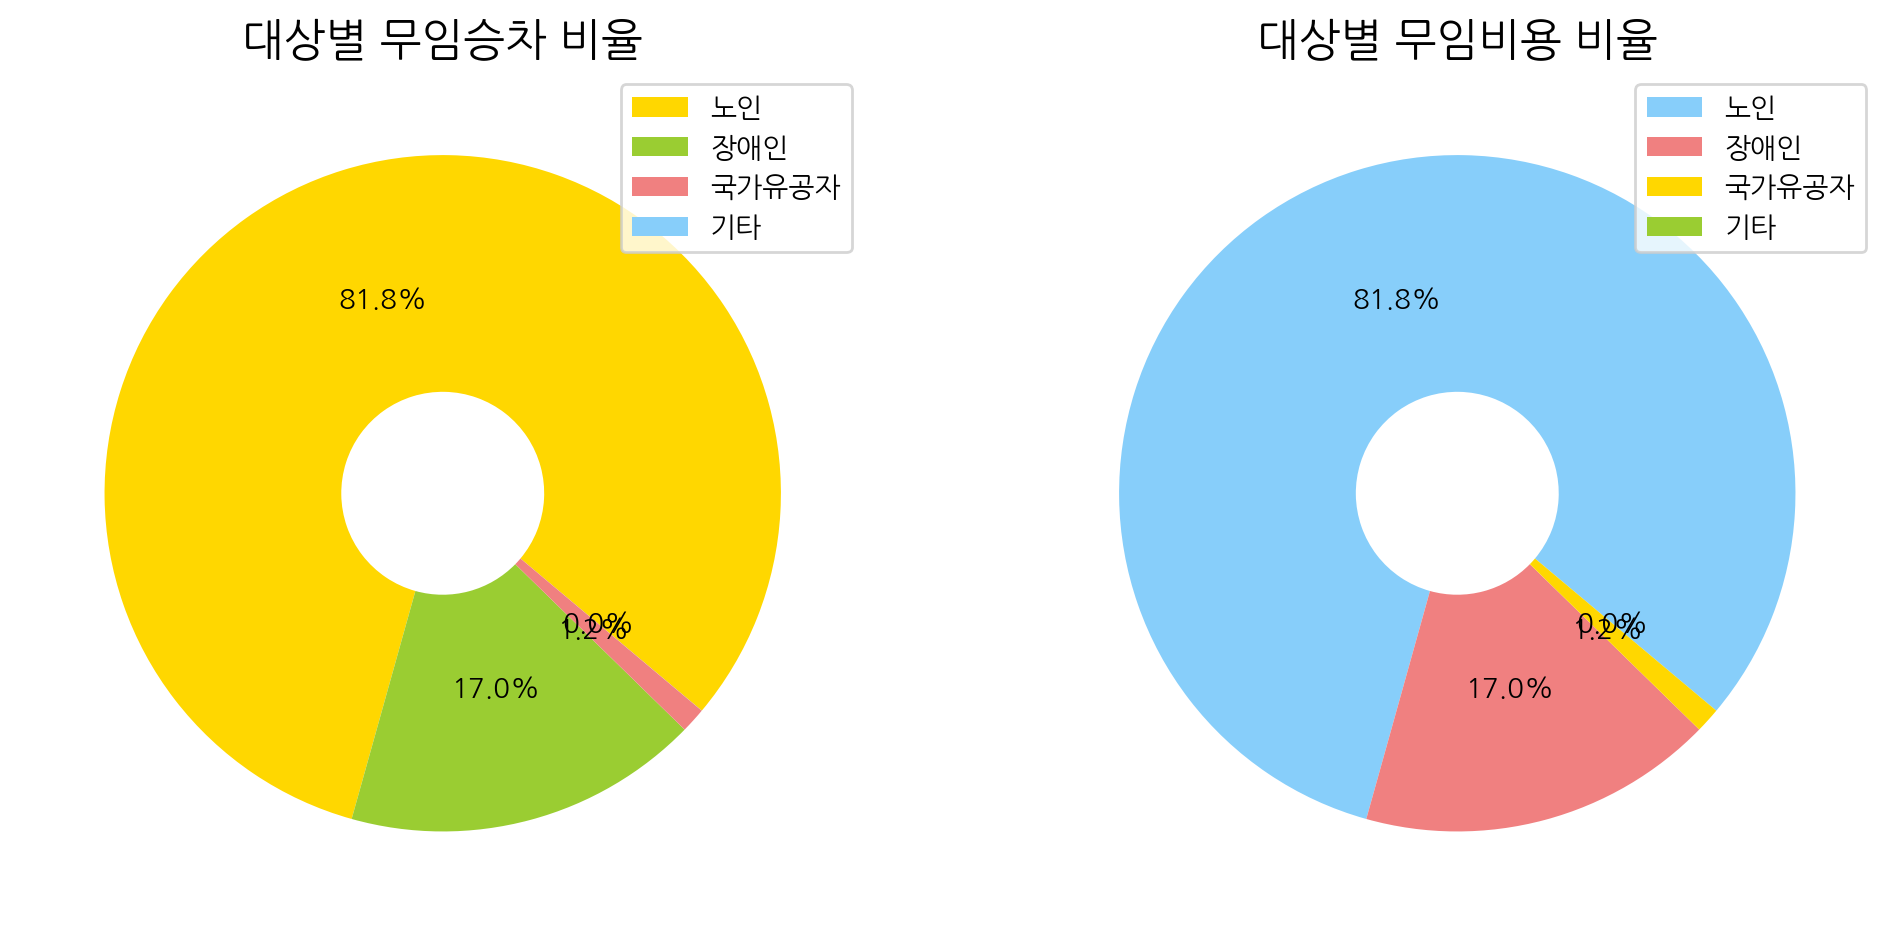

In [84]:
# df_sub_mean 사용

import matplotlib.pyplot as plt

# 몇개그릴지
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 인원수 비율
values1 = df_sub_mean['무임승차(천명)'].tolist()
labels1 = df_sub_mean.index.tolist()
colors1 = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
ax1.pie(values1, colors=colors1, wedgeprops=dict(width=0.7), startangle=-40, autopct='%1.1f%%')
ax1.set_title('대상별 무임승차 비율', fontsize=16)

# 비용 비율
values2 = df_sub_mean['무임비용(억원)'].tolist()
labels2 = df_sub_mean.index.tolist()
colors2 = ['lightskyblue', 'lightcoral', 'gold', 'yellowgreen']
ax2.pie(values2, colors=colors2, wedgeprops=dict(width=0.7), startangle=-40, autopct='%1.1f%%')
ax2.set_title('대상별 무임비용 비율', fontsize=16)

# 도넛차트에 레이블 추가
ax1.legend(labels1, loc='best')
ax2.legend(labels2, loc='best')

plt.show()


In [85]:
# 퍼센트 표시 성공
fig = make_subplots(specs=[[{"secondary_y": True}]])


# 노인무임비용비율
fig.add_trace(go.Bar(x=df_senior['연도'], y=df_senior['노인무임비용비율']/100, name='손실액 대비 노인무임승차비용', marker=dict(color='orange')), secondary_y=False)

# 노인무임승차비율
fig.add_trace(go.Scatter(x=df_senior['연도'], y=df_senior['노인무임승차비율']/100, name='승객 수 대비 노인무임승차 수', line=dict(color='blue')), secondary_y=True)


#y축 
fig.update_yaxes(title_text='비율비율(%)', range=[0, 1], tickformat=".0%", secondary_y=False)
fig.update_yaxes(title_text="승차비율(%)", range=[0.1,0.2], tickformat=".0%",secondary_y=True)

fig.update_layout(title_text='노인 무임승차수 비율과 손실액 대비 무임비용 비율',
                  xaxis_title='연도')

fig.show()

In [86]:
# 페이지 16

df_senior_pct

,연도,승차인원증감율,노인무임승차인원증감율,영업손실증감율,노인무임비용증감율,노인무임승차비율증감율,손실액대비노인무임비용증감율
0,2017,0.00,0.00,0.00,0.00,0.00,0.00
1,2018,0.72,3.59,3.32,3.34,2.84,0.02
2,2019,2.01,6.93,-0.98,6.75,4.83,7.81
3,2020,-27.15,-28.66,102.45,-28.89,-2.07,-64.87
4,2021,1.07,6.99,-13.30,7.18,5.86,23.63


In [87]:
# 페이지 16
df

,연도,연간승차(천명),무임승차(천명),영업손실(억원),무임비용(억원),연간승차 대비 무임승차,손실액 대비 무임비용
0,2017,1865024,273446,5511.0,3679,14.661795,66.757394
1,2018,1878463,280259,5694.0,3761,14.919591,66.051985
2,2019,1916172,297237,5638.0,3952,15.512021,70.095779
3,2020,1395869,213124,11414.0,2861,15.268195,25.065709
4,2021,1410854,224693,9896.0,3021,15.926028,30.527486


In [88]:
# 다양하게
# df_senior

df_senior["연도"] = df_senior["연도"].astype(int)


import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=2,
                    specs=[[{}, {"secondary_y": True}],
                           [{}, {"secondary_y": True}],
                           [{}, {"secondary_y": True}]],
                    subplot_titles=("연간 승차인원", "노인 무임승차 비용", "노인 무임승차인원 비율", "노인무임비용 대비 손실액비율", "노인무임승차비율과 증감율","영업손실액"))


# 승차인원 선그래프
fig.add_trace(
    go.Scatter(x=df_senior["연도"], y=df_senior["연간승차(천명)"], mode="lines+markers", name="연간승차(천명)"),
    row=1, col=1)
fig.add_trace(
    go.Scatter(x=df_senior["연도"], y=df_senior["노인무임승차(천명)"], mode="lines+markers", name="노인무임승차(천명)"),
    row=1, col=1)
fig.update_xaxes(title_text="연도", row=1, col=1)
fig.update_yaxes(title_text="승차인원(천명)", row=1, col=1)

# 노인무임승차비용 막대그래프
fig.add_trace(
    go.Bar(x=df_senior["연도"], y=df_senior["노인무임비용(억원)"], name="노인무임비용(억원)"),
    row=1, col=2)
fig.update_xaxes(title_text="연도", row=1, col=2)
fig.update_yaxes(title_text="금액(억원)", range=[0, 12000], row=1, col=2)

# 승차인원 비율 선그래프
fig.add_trace(
    go.Scatter(x=df_senior["연도"], y=df_senior["노인무임승차비율"], mode="lines+markers", name="노인무임승차비율"),
    row=2, col=1)
fig.update_xaxes(title_text="연도", row=2, col=1)
fig.update_yaxes(title_text="증감율(%)", range=[10,15], row=2, col=1)

# 노인무임승차비용 비율 막대
fig.add_trace(
    go.Bar(x=df_senior["연도"], y=df_senior["노인무임비용비율"], name="노인무임비용/손실액"),
    row=2, col=2)
fig.update_xaxes(title_text="연도", row=2, col=2)
fig.update_yaxes(title_text="비율(%)", range=[0, 100], row=2, col=2)


# 노인무임승차비용, 증감율
fig.add_trace(
    go.Bar(x=df_senior["연도"], y=df_senior["노인무임승차비율"], name="노인무임승차비율"),
    row=3, col=1)
fig.add_trace(
    go.Scatter(x=df_senior["연도"], y=df_senior_pct["노인무임승차비율증감율"], mode="lines+markers", name="비율증감율"),
    row=3, col=1)
fig.update_xaxes(title_text="연도", row=3, col=1)
fig.update_yaxes(title_text="비율/증감율(%)", range=[-10, 25], row=3, col=1)

# 영업손실액
fig.add_trace(
    go.Bar(x=df_senior["연도"], y=df_senior["영업손실(억원)"], name="영업손실(억원)"),
    row=3, col=2, secondary_y=False)
fig.add_trace(
    go.Scatter(x=df_senior["연도"], y=df_senior_pct["영업손실증감율"], mode="lines+markers", name="영업손실증감율"),
    row=3, col=2,  secondary_y=True )
fig.update_xaxes(title_text="연도", row=3, col=2)
fig.update_yaxes(title_text="금액(억원)", range=[0, 12000], row=3, col=2, secondary_y=False)
fig.update_yaxes(title_text="증감율(%)", range=[-50,150], row=3, col=2, secondary_y=True)
 

fig.update_layout(height=1000, width=1000,title_text="여러가지 시각화")
fig.show()


In [89]:
# df_senior
# 20년도 팍 떨어지는거... 
# 영업손실(승차인원수가 떨어져서) 하지만 노인무임비용은 줄었다
# 페이지 16


import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(x=df_senior['연도'], y=df_senior['영업손실(억원)'], name='영업손실액'))
fig.add_trace(go.Bar(x=df_senior['연도'], y=df_senior['노인무임비용(억원)'], name='노인무임비용'))

fig.update_layout(title='연도별 노인무임/승차인원과 노인무임비용/손실액',
                  xaxis_title='연도',
                  yaxis=dict(title='금액(억원)', side='left'),
                  yaxis2=dict(title='인원(천명)', side='right', overlaying='y'),
                  legend=dict(x=1.2, y=0.9)) # 범례 위치 조정

fig.add_trace(go.Scatter(x=df_senior['연도'], y=df_senior['연간승차(천명)'], name='연간승차자수', 
                         yaxis='y2'))
fig.add_trace(go.Scatter(x=df_senior['연도'], y=df_senior['노인무임승차(천명)'], name='노인무임승차자수', 
                         yaxis='y2'))

fig.show()


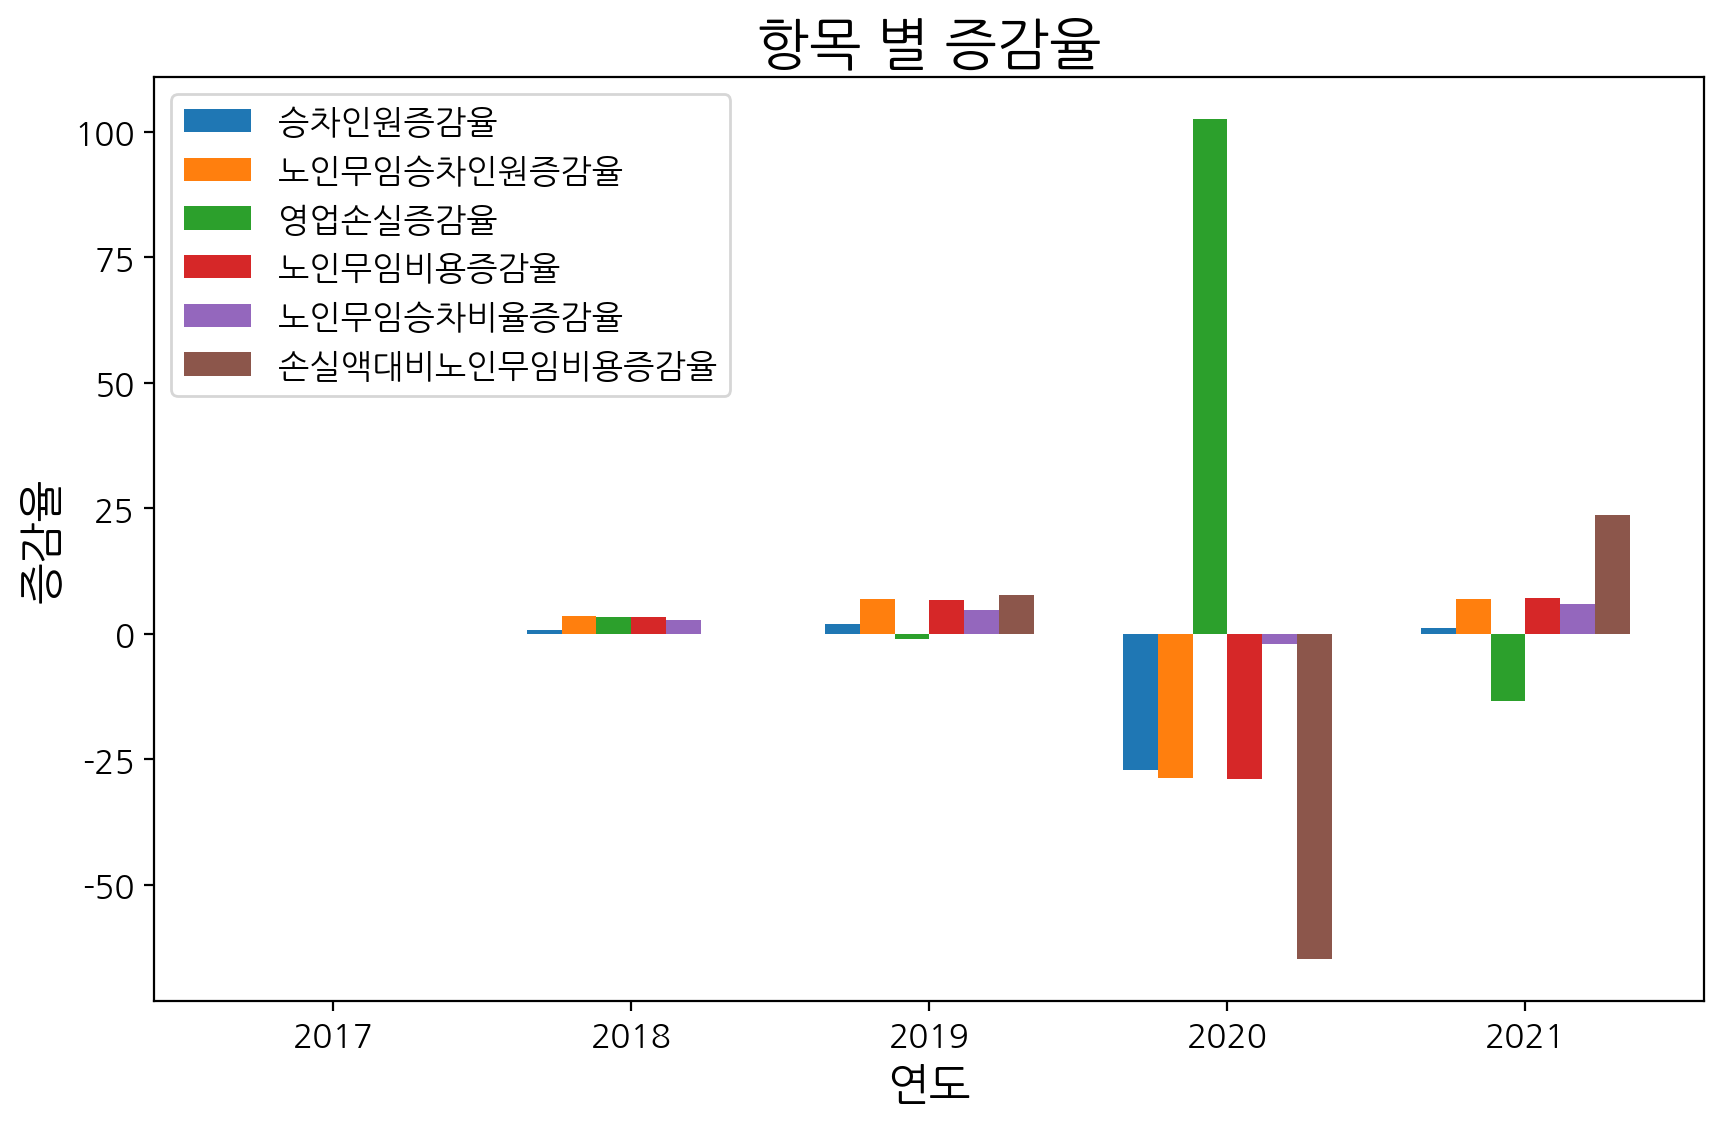

In [90]:
# 페이지 16

# 연도 컬럼을 시각화하지 않기위해 
# 깊은복사 후 '연도'컬럼 인덱스 설정
df_c = df_senior_pct.copy()
df_c.set_index('연도', inplace=True)

# 다중 막대그래프 시각화
ax = df_c.plot(kind='bar', figsize=(10,6), width=0.7)
ax.set_title('항목 별 증감율', fontsize=20)
ax.set_xlabel('연도', fontsize=16)
ax.set_ylabel('증감율', fontsize=16)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()

# 만약 노인연령을 상향한다면…

## 노인 연령을 70세로 상향한다면 정말 지하철 적자를 유의미하게 메꿀 수 있을까?

### 17~21년도 70세로 연령 상향 시 발생하는 이익

#### 데이터 불러오기

##### 서울시 연령대별 인구 데이터

In [91]:
# 서울시 연령대별 인구 데이터 데이터 가져오기

pop = pd.read_csv(url_pop, encoding='cp949')
pop.head()

,시나리오별(1),시도별(1),성별(1),연령별(1),2022,2023,2024,2025,2026
0,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,서울특별시,계,계,9411443,9338274,9271433,9209988,9152114
1,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,서울특별시,계,0 - 4세,233066,211978,194295,183670,180529
2,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,서울특별시,계,5 - 9세,318943,297627,278318,253815,227795
3,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,서울특별시,계,10 - 14세,348179,340206,333699,330207,321088
4,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,서울특별시,계,15 - 19세,370749,366544,358042,354120,356122


In [92]:
# 데이터의 형식과 구조 확인하기

pop.shape
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시나리오별(1)  23 non-null     object
 1   시도별(1)    23 non-null     object
 2   성별(1)     23 non-null     object
 3   연령별(1)    23 non-null     object
 4   2022      23 non-null     int64 
 5   2023      23 non-null     int64 
 6   2024      23 non-null     int64 
 7   2025      23 non-null     int64 
 8   2026      23 non-null     int64 
dtypes: int64(5), object(4)
memory usage: 1.7+ KB


##### 지하철 운영기관별 손익계산서 데이터

In [93]:
#지하철 운영기관별 손익계산서 데이터 가져오기

pnl = pd.read_csv(url_pnl, encoding='cp949')
pnl.head()

,운영기관별(1),시점,영업수입,영업수입.1,영업수입.2,영업비용,영업비용.1,영업비용.2,영업손익,영업외수익,영업외비용,경상손익
0,운영기관별(1),시점,소계,운수사업수익,기타사업수익,소계,인건비,경비,소계,소계,소계,소계
1,서울교통공사,2017,19673,16165,3508,24892,12911,11981,-5219,772,807,-5254.0
2,서울교통공사,2018,19865,16234,3631,25187,12748,12439,-5322,1684,1751,-5389.0
3,서울교통공사,2019,20046,16367,3679,25370,12602,12768,-5324,504,1045,-5865.0
4,서울교통공사,2020,15595,11932,3663,26497,13551,12946,-10902,507,743,-11138.0


In [94]:
# 데이터의 형식과 구조 확인하기
# 0행 때문에 모두 object로 처리됨. -> 수정필요

pnl.shape
pnl.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   운영기관별(1)  64 non-null     object
 1   시점        64 non-null     object
 2   영업수입      64 non-null     object
 3   영업수입.1    64 non-null     object
 4   영업수입.2    64 non-null     object
 5   영업비용      64 non-null     object
 6   영업비용.1    64 non-null     object
 7   영업비용.2    64 non-null     object
 8   영업손익      64 non-null     object
 9   영업외수익     64 non-null     object
 10  영업외비용     64 non-null     object
 11  경상손익      64 non-null     object
dtypes: object(12)
memory usage: 6.1+ KB


#### 데이터 전처리

##### 서울시 연령대별 인구 데이터 전처리

In [95]:
# 서울시 연령대별 인구 데이터 전처리
pop.head()

,시나리오별(1),시도별(1),성별(1),연령별(1),2022,2023,2024,2025,2026
0,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,서울특별시,계,계,9411443,9338274,9271433,9209988,9152114
1,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,서울특별시,계,0 - 4세,233066,211978,194295,183670,180529
2,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,서울특별시,계,5 - 9세,318943,297627,278318,253815,227795
3,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,서울특별시,계,10 - 14세,348179,340206,333699,330207,321088
4,중위 추계(기본 추계: 출산율-중위 / 기대수명-중위 / 국제이동-중위 / 국내이동...,서울특별시,계,15 - 19세,370749,366544,358042,354120,356122


In [96]:
# 불필요한 컬럼 제거 및 컬럼명 바꾸기
pop = pop.drop(columns=['시나리오별(1)', '성별(1)'], axis=1)
pop = pop.rename(columns = {'시도별(1)':'시도', '연령별(1)':'연령대', '연령별(2)':'나이'})
pop.head(2)

,시도,연령대,2022,2023,2024,2025,2026
0,서울특별시,계,9411443,9338274,9271433,9209988,9152114
1,서울특별시,0 - 4세,233066,211978,194295,183670,180529


In [97]:
# tidy data 만들기

pop_m = pd.melt(pop, id_vars=['시도', '연령대', '나이'], var_name='연도', value_name='인구수')
pop_m

KeyError: "The following 'id_vars' are not present in the DataFrame: ['나이']"

In [ ]:
#컬럼별 data type 확인
# melt를 하는 과정에서 '연도'가 셀로 내려옴에 따라 object 타입으로 바뀜

# 연도 타입 object -> int

pop_m.dtypes
pop_m["연도"] = pop_m["연도"].astype("int")

##### 영업손익 데이터 전처리


In [ ]:
pnl.head()

In [ ]:
# 컬럼명 변경

pnl_cols = ["운영기관", "연도", "영업수입 합계", "운수사업수익", "기타사업수익",
           "영업비용", "인건비", "경비", "영업손익", "영업외수익", "영업외비용", "경상손익"]
pnl.columns = pnl_cols
pnl.head()

In [ ]:
# 불필요한 0행 제거

pnl = pnl.drop([0], axis=0)

In [ ]:
# 필요한 컬럼만 가져오기
# '운영기관' 컬림 요소 확인하기

pnl2 = pnl[["운영기관", "연도", "영업손익"]]
pnl2["운영기관"].unique()

In [ ]:
# 서울 지하철만 가져오기
seoul_subway = ['서울교통공사', '서울메트로 9호선㈜', '서울교통공사9호선운영부문', '우이 신설경전철㈜']

pnl2 = pnl2[pnl2["운영기관"].isin(seoul_subway)]
pnl2

In [ ]:
pnl2.dtypes

In [ ]:
# 연도, 영업손익 데이터 타입 바꾸기
pnl2["연도"] = pnl2["연도"].astype(int)
pnl2["영업손익"] = pnl2["영업손익"].astype(int)
pnl2.dtypes

In [ ]:
# 연도별 영업손익 합계 구하기
# 우선 2017년도로 생각해보기

pnl2[pnl2["연도"] == 2017]["영업손익"].sum()

In [ ]:
# 연도별 영업손익 합계 구하는 함수
def yr_pnl(yr):
    
    # 해당연도의 영업손익 합계 가져오기
    pnl2_yr_sum = pnl2[pnl2["연도"] == yr]["영업손익"].sum()
    
    return pnl2_yr_sum

# 반복문으로 모든 연도의 영업손익 합계 가져오기
yr_pnl_list = []

for i in range(2017, 2022):
    yr_pnl_list.append(yr_pnl(i))
    
yr_pnl_list

In [ ]:
# 연도별 영업손익

yr = [2017, 2018, 2019, 2020, 2021]
yr_pnl = pd.DataFrame({'연도':yr,
                      '영업손익(억원)':yr_pnl_list})
yr_pnl

#### 연도별 서울시 만 65세 ~ 69세 인구수 구하기
- 우선 17년으로 작업 후 21년까지 반복문 돌리기

In [ ]:
# 2017년 자료만 가져오기
pop_17 = pop_m[pop_m["연도"] == 2017]
pop_17.tail(2)

In [ ]:
# 2017년 서울시 만 65세 ~ 69세 인구 수 구하기 ('소계' 이용)

pop_17_6569sum = (pop_17[pop_17["연령대"] == "65 - 69세"]).iloc[0, -1]
display(pop_17[pop_17["연령대"] == "65 - 69세"])
display(pop_17_6569sum)

- **17 ~ 21년 서울시 만 65세 ~ 69세 인구 수만 추출하기**

In [ ]:
# 연도별 해당연도의 65-69세 인구 수 합계를 구하는 함수

def pop_yr_6569sum(yr):
    
    # 해당연도 데이터프레임만 가져오기
    pop_yr = pop_m[pop_m["연도"] == yr]
    
    # 해당연도의 65-69세 인구 수 합계 가져오기
    pop_yr_6569sum = (pop_yr[pop_yr["연령대"] == "65 - 69세"]).iloc[0, -1]
    
    return pop_yr_6569sum

In [ ]:
# 반복문 돌리기 -> 17 ~ 21년 서울시 만 65세 ~ 69세 인구 수만 추출하기

yr_6569sum_list = []

for i in range(2017, 2022):
    yr_6569sum_list.append(pop_yr_6569sum(i))
    
yr_6569sum_list

In [ ]:
# 데이터 프레임으로 만들기

yr_6569 = pd.DataFrame({'연도':yr,
                      '만 65세 ~ 69세 인구 수':yr_6569sum_list})
yr_6569

####  연도별 "대중교통을 이용하는" 서울시 만 65세 ~ 69세 인구수 구하기

- (2018년도 기준)
- 서울시 만 65세 이상 인구 수 (1,341,836) - 출처: KOSIS
- 대중교통을 이용하는 서울시 만 65세 이상 인구 수 (83만명) - 출처: 뉴스기사(http://segyelocalnews.com/news/newsview.php?ncode=1065625174648440#:~:text=%EB%B6%84%EC%84%9D%20%EA%B2%B0%EA%B3%BC%20%EC%84%9C%EC%9A%B8%20%EB%8C%80%EC%A4%91%EA%B5%90%ED%86%B5,%EC%A3%BC%EC%9D%BC%EA%B0%84%208%EB%A7%8C%EB%AA%85%EC%9D%B4%20%EB%84%98%EC%97%88%EB%8B%A4)
- => 따라서 만 65세 이상 노인 인구 중 대중교통을 이용하는 인구 수 비율은 약 61.9%

#### 연도별 "대중교통을 이용하는" 서울시 만 65세 ~ 69세 인구수 구하기

- (2018년도 기준)
- 서울시 만 65세 이상 인구 수 (1,341,836) - 출처: KOSIS
- 대중교통을 이용하는 서울시 만 65세 이상 인구 수 (83만명) - 출처: 뉴스기사
- (http://segyelocalnews.com/news/newsview.php?ncode=1065625174648440#:~:text=%EB%B6%84%EC%84%9D%20%EA%B2%B0%EA%B3%BC%20%EC%84%9C%EC%9A%B8%20%EB%8C%80%EC%A4%91%EA%B5%90%ED%86%B5,%EC%A3%BC%EC%9D%BC%EA%B0%84%208%EB%A7%8C%EB%AA%85%EC%9D%B4%20%EB%84%98%EC%97%88%EB%8B%A4)
- => 따라서 만 65세 이상 노인 인구 중 대중교통을 이용하는 인구 수 비율은 약 61.9%

In [ ]:
yr_6569["대중교통을 이용하는 서울시 만 65세 ~ 69세 인구 수"] = yr_6569["만 65세 ~ 69세 인구 수"]*0.691
yr_6569

#### 연도별 "지하철을 이용하는" 서울시 만 65세 ~ 69세 인구수 구하기

In [ ]:
yr_6569["지하철을 이용하는 서울시 만 65세 ~ 69세 인구 수"] = yr_6569["대중교통을 이용하는 서울시 만 65세 ~ 69세 인구 수"]*0.8
yr_6569

#### 최종) 연도별 노인연령을 70세로 상향 시 발생하는 이익
- (http://segyelocalnews.com/news/newsview.php?ncode=1065625174648440#:~:text=%EB%B6%84%EC%84%9D%20%EA%B2%B0%EA%B3%BC%20%EC%84%9C%EC%9A%B8%20%EB%8C%80%EC%A4%91%EA%B5%90%ED%86%B5,%EC%A3%BC%EC%9D%BC%EA%B0%84%208%EB%A7%8C%EB%AA%85%EC%9D%B4%20%EB%84%98%EC%97%88%EB%8B%A4)
- 하루 평균 노인들의 대중교통 이용 횟수는 2.4회
- 기본요금 1250원

In [ ]:
yr_6569["70세로 연령 상향 시 하루에 발생하는 이익"] = yr_6569["지하철을 이용하는 서울시 만 65세 ~ 69세 인구 수"]*2.4*1250
yr_6569

In [ ]:
yr_6569["노인연령상향 시 발생하는 연간 이익"] = yr_6569["70세로 연령 상향 시 하루에 발생하는 이익"] * 365
yr_6569

In [ ]:
# 천단위 콤마와 단위 붙이기
yr_6569["노인연령상향 시 발생하는 연간 이익"] = yr_6569["노인연령상향 시 발생하는 연간 이익"].map('{:,.0f}'.format) + "원"

In [ ]:
yr_6569

In [ ]:
yr_70up_pft = yr_6569[["연도","노인연령상향 시 발생하는 연간 이익"]]
yr_70up_pft

In [ ]:
# pandas로 그려보기
# 참고 : https://jimmy-ai.tistory.com/24
# 단위가 너무 차이나서 제대로 그래프가 그려지지 않음...

x = yr_6569["연도"]
y = yr_6569["노인연령상향 시 발생하는 연간 이익"]

bar = plt.bar(x, y)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 8)

plt.title("연도별 70세로 연령 상향 시 발생하는 연간 이익")
plt.show()

In [ ]:
# plotly로 그려보기
# seaborn, matplotlib에 비해 훨씬 느림

px.bar(yr_6569, x="연도", y="노인연령상향 시 발생하는 연간 이익", height=400)

In [ ]:
# 연도별 영업손익과 노인연령 상향 시 발생하는 수익 비교

display(yr_pnl)
display(yr_70up_pft)

In [ ]:
# 영업손실 단위 변경: 억원 -> 원

yr_pnl["영업손익(억원)"] = yr_pnl["영업손익(억원)"].astype(int)
yr_pnl["영업손익(원)"] = yr_pnl["영업손익(억원)"]*(1E+8)

yr_pnl

In [ ]:
yr_pnl["영업손익"] = yr_pnl["영업손익(원)"].map('{:,.0f}'.format) + "원"

yr_pnl

In [ ]:
yr_pnl2 = pd.merge(yr_pnl, yr_70up_pft, on="연도")
yr_lp = yr_pnl2[["연도", "영업손익", "노인연령상향 시 발생하는 연간 이익"]]
yr_lp

In [ ]:
# 시각화를 나타내기 위해 숫자형으로 다시 바꾸기

yr_6569["노인연령상향 시 발생하는 연간 이익(원)"] = yr_6569["70세로 연령 상향 시 하루에 발생하는 이익"] * 365

In [ ]:
yr_6569

In [ ]:
display(yr_pnl[["연도", "영업손익(원)"]])
display(yr_6569[["연도", "노인연령상향 시 발생하는 연간 이익(원)"]])

yr_loss = yr_pnl[["연도", "영업손익(원)"]]
yr_70up_pft2 = yr_6569[["연도", "노인연령상향 시 발생하는 연간 이익(원)"]]

In [ ]:
# 영업손익 데이터 프레임과 65세~69세 인구 합계 데이터프레임 연도를 기준으로 병합
yr_lnp = pd.merge(yr_loss, yr_70up_pft2, on="연도")
yr_lnp

In [ ]:
yr_lnp["영업손실"] = yr_lnp["영업손익(원)"]*(-1)
yr_lnp

In [ ]:
yr_lnp_rate = yr_lnp["노인연령상향 시 발생하는 연간 이익(원)"]/yr_lnp["영업손실"]
yr_lnp["영업손실대비 연령상한시 이익비율(%)"] = round(yr_lnp_rate, 4)
yr_lnp

In [ ]:
yr_lnp[["연도", "영업손실", "노인연령상향 시 발생하는 연간 이익(원)", "영업손실대비 연령상한시 이익비율(%)"]]

In [ ]:
yr_lnp.plot.bar(x="연도", y="영업손실대비 연령상한시 이익비율(%)", rot=0
               , title="연도별 영업손실대비 연령상한시 이익비율")

### 17~21년도 지하철 1인당 평균운임과 70세로 연령 상향시 발생했을 1인당 평균운임 비교

#### 데이터 불러오기

In [ ]:
# 무임승차 대상별 현황 데이터 불러오기
# 승객 1인당 운임손실 현황 데이터 불러오기
# 승차 및 수송인원 데이터 불러오기
nm = pd.read_csv(url_nomoney, encoding='cp949')
dft = pd.read_csv(url_deficit, encoding='cp949')
cry = pd.read_csv(url_carry, encoding='cp949')

#### 데이터 전처리

In [ ]:
# 무임승차 대상별 현황 데이터 살펴보기
nm.head()
nm.tail()

In [ ]:
# '무임비용' 컬럼이 object인 것을 확인 -> 숫자형으로 수정필요
nm.shape
nm.info()

In [ ]:
# 컬럼명 변경
nm = nm.rename(columns = {"운영기관별(1)":"운영기관", "시점":"연도", "대상별(1)":"대상"})
nm.head()

In [ ]:
# '무임비용 (백만원)' 컬럼의 타입을 int로 변경하기
# '-'값 발견
nm['무임비용 (백만원)'] = nm['무임비용 (백만원)'].astype(int)

In [ ]:
# '-'를 null값으로 변경
nm['무임비용 (백만원)'] = nm['무임비용 (백만원)'].replace('-', np.nan)
nm['무임비용 (백만원)'].isnull().sum()

In [ ]:
# ['무임비용 (백만원)'] 컬럼의 타입을 float로 변경하기
nm['무임비용 (백만원)'] = nm['무임비용 (백만원)'].astype(float)
nm.dtypes

In [ ]:
# '대상' 컬럼에서 '노인'만 가져오기
nm_elderly = nm[nm["대상"] == "노인"].reset_index(drop=True)
nm_elderly

In [ ]:
# '운영기관'에서 서울 지하철만 가져오기
nm_elderly["운영기관"].unique()

In [ ]:
seoul_subway = ['서울교통공사', '서울메트로 9호선(주)', '서울교통공사9호선운영부문', '우이 신설경전철(주)']
nm_elderly = nm_elderly[nm_elderly["운영기관"].isin(seoul_subway)]
nm_elderly

In [ ]:
# 연도별 서울 전체 지하철의 무임비용 구하기
# 일단 2017년부터

nm_elderly[nm_elderly["연도"] == 2017]

In [ ]:
# 연도를 입력하면 노인 무임비용의 합계를 구하는 함수

def yr_nm(yr):
    nm_yr = nm_elderly[nm_elderly["연도"] == yr]
    nm_sum = nm_yr["무임비용 (백만원)"].sum()
    
    return nm_sum

In [ ]:
yr_nm(2017)

In [ ]:
# 17~21년 노인 무임비용의 합계 구하기

yr_nm_list = []

for i in range(2017, 2022):
    yr_nm_list.append(yr_nm(i))

yr_nm_list

In [ ]:
# 데이터프레임 만들기

yr_nm = pd.DataFrame({'연도':yr, '무임비용(백만원)': yr_nm_list})
yr_nm

##### 승객 1인당 운임손실 현황 살펴보기


In [ ]:
dft.shape

In [ ]:
dft.head()

In [ ]:
dft.tail()

In [ ]:
# 운임손실, 수송원가 컬럼이 object인 것을 확인 -> 숫자형으로 수정 필요

dft.info()

In [ ]:
# 데이터 타입 변경
# '-'값 발견
dft['운임손실 (원)'] = dft['운임손실 (원)'].astype('int')
dft['수송원가 (원)'] = dft['수송원가 (원)'].astype('int')

In [ ]:
# '-'값을 null값으로 변경

dft['운임손실 (원)'] = dft['운임손실 (원)'].replace('-', np.nan)
dft['수송원가 (원)'] = dft['수송원가 (원)'].replace('-', np.nan)

In [ ]:
display(dft['운임손실 (원)'].isnull().sum())
display(dft['수송원가 (원)'].isnull().sum())

In [ ]:
# float형식으로 변환
dft['운임손실 (원)'] = dft['운임손실 (원)'].astype('float')
dft['수송원가 (원)'] = dft['수송원가 (원)'].astype('float')

In [ ]:
# 컬럼명 변경
dft = dft.rename(columns = {"운영기관별(1)":"운영기관", "시점":"연도"})
dft.head()

In [ ]:
# '운영기관'에서 서울 지하철만 가져오기
dft["운영기관"].unique()

seoul_subway = ['서울교통공사', '서울메트로 9호선㈜', '서울교통공사9호선운영부문', '우이 신설경전철(주)']
dft = dft[dft["운영기관"].isin(seoul_subway)]
dft.tail()

In [ ]:
# 연도별 서울의 모든 지하철의 평균 운임료 구하기
# 우선 2017년 평균 운임료 구하기

dft_17 = dft[dft["연도"] == 2017]
dft_17

In [ ]:
# 2017년도의 서울 지하철 기관들의 평균운임의 평균
dft_17["평균운임 (원)"].mean()

In [ ]:
# 연도를 입력하면 평균운임이 출력되는 함수

def yr_mean(yr):
    dft_yr = dft[dft["연도"] == yr]
    yr_mean = dft_yr["평균운임 (원)"].mean()
    
    return yr_mean

In [ ]:
# 함수가 잘 작동하는지 확인
yr_mean(2017)

In [ ]:
# 17~21년 평균운임 구하기

yr_mean_list = []

for i in range(2017, 2022):
    yr_mean_list.append(yr_mean(i))

yr_mean_list

In [ ]:
# 데이터프레임 만들기

yr_fare = pd.DataFrame({'연도':yr, '평균운임(원)': yr_mean_list})
yr_fare

##### 승차 및 수송인원 데이터 살펴보기


In [ ]:
# 승차 및 수송인원 데이터 살펴보기
cry.head()

In [ ]:
cry.isnull().sum()

In [ ]:
cry.info()

In [ ]:
cry["운영기관별(1)"].unique()

In [ ]:
cry_seoul = cry[cry["운영기관별(1)"] == '서울']
cry_seoul

In [ ]:
cry_seoul = cry_seoul.rename(columns = {"운영기관별(1)":"지역"})
cry_seoul.head(2)

In [ ]:
# 서울의 연도별 수송인원 구하기

yr_seoul_carry = pd.DataFrame({"연도":[2017, 2018, 2019, 2020, 2021], "수송인원(천명)":cry_seoul["수송인원 (천명/년)"].to_list()})
yr_seoul_carry

##### 전국 연령대별 인구수 데이터

In [ ]:
# 17~21년도 70세로 연령 상향 시 발생하는 이익에서 생성한 pop_m 테이블로
# 연도별 만 65세 이상 인구수 구하기

pop_m.head()

In [ ]:
pop_m[(pop_m["연도"]==2017) & (pop_m["나이"]=="소계")]

In [ ]:
pop_m[(pop_m["연도"]==2017) & (pop_m["나이"]=="소계")]["인구수"].sum()

In [ ]:
yr_pop_65 = []

for i in range(2017, 2022):
    sum_65 = pop_m[(pop_m["연도"]==i) & (pop_m["나이"]=="소계")]["인구수"].sum()
    yr_pop_65.append(sum_65)
    
yr_pop_65

In [ ]:
yr_pop_65 = pd.DataFrame({"연도":yr, "65세 이상 인구수": yr_pop_65})
yr_pop_65

In [ ]:
# 연도별 만 65세 ~ 69세 인구수 구하기

yr_pop_6569 = yr_6569[["연도", "만 65세 ~ 69세 인구 수"]]
yr_pop_6569

#### 5개 데이터프레임 합치기

In [ ]:
df_list = [yr_fare, yr_nm, yr_seoul_carry, yr_pop_65, yr_pop_6569]

In [ ]:
from functools import reduce

df_merge = reduce(lambda left, right: pd.merge(left, right, on='연도'), df_list)
df_merge

참고 : https://stopsilver.tistory.com/entry/python-pandas-%EC%97%AC%EB%9F%AC%EA%B0%9C%EC%9D%98-dataframe%EC%9D%84-merge

### 분석3. 17~21년도 지하철 운임손실(영업손실)과 70세로 연령 상향했다면 발생하는 운임손실 비교

#### 데이터 불러오기

In [ ]:
df_merge

### 전처리

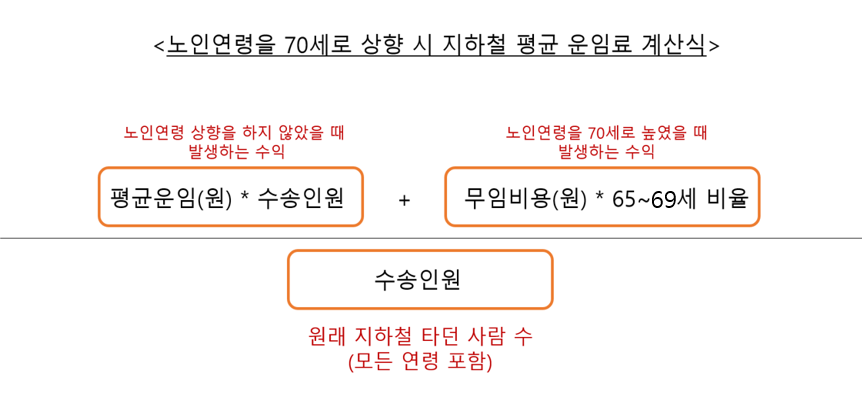

In [ ]:
# 현재 지하철이 버는 돈(노인 연령 상향 X)
subway_money = df_merge['평균운임(원)'] * (df_merge['수송인원(천명)']*(1E+3))
subway_money

In [ ]:
# 노인 연령을 70세로 높이면 지하철이 버는 돈
subway_70up_money = df_merge['무임비용(백만원)']*(1E+6) * (df_merge['만 65세 ~ 69세 인구 수']/df_merge['65세 이상 인구수'])
subway_70up_money

In [ ]:
# 서울지하철이 해당연도에 수송한 총 인원
carry_num = df_merge["수송인원(천명)"]*(1E+3)
carry_num

In [ ]:
# 노인연령을 70세로 상향 시 평균 운임료

sbw_70up_fare = (subway_money + subway_70up_money) / carry_num
sbw_70up_fare

In [ ]:
mean_fare_70up = pd.DataFrame({"연도":yr, "노인연령을 70세로 상향 시 평균 운임(원)":sbw_70up_fare})
mean_fare_70up

In [ ]:
df_merge.iloc[:, :2]

In [ ]:
# 기존 평균운임과 노인연령을 70세로 상향했을 때 평균 운임 비교

sub_fare = pd.merge(df_merge.iloc[:, :2], mean_fare_70up, on="연도")
sub_fare["평균운임(원)"] = round(sub_fare["평균운임(원)"], 1)
sub_fare["노인연령을 70세로 상향 시 평균 운임(원)"] = round(sub_fare["노인연령을 70세로 상향 시 평균 운임(원)"], 1)

sub_fare

In [ ]:
# 평균운임 변화율 컬럼 추가하기

icrm = (sub_fare["노인연령을 70세로 상향 시 평균 운임(원)"] - sub_fare["평균운임(원)"])/sub_fare["평균운임(원)"]
sub_fare["평균운임 변화율(%)"] = round(icrm*100, 2)
sub_fare

In [ ]:
sub_fare["노인연령을 70세로 상향 시 평균 운임(원)"] - sub_fare["평균운임(원)"]

In [ ]:
# 시각화
# 참고 : https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

x = np.arange(len(sub_fare["연도"]))
width=0.25
multiplier = 0

fig, ax = plt.subplots(constrained_layout=True)

for attribute, measurement in sub_fare.iloc[:,1:3].items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('평균운임 (원)')
ax.set_title('기존 평균운임과 노인연령을 70세로 상향했을 때 평균 운임 비교')
ax.set_xticks(x + width, sub_fare["연도"])
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 1500)

plt.show()

In [ ]:
# matplotlib으로 평균임금 증가량 나타내기

sub_fare2 = sub_fare.set_index("연도")

In [ ]:
sub_fare2

In [ ]:
# matplotlib으로 평균운임 증가량 시각화

sub_fare2.iloc[:, -1].plot.line(figsize=(10, 5), lw=0.9, rot=0)

In [ ]:
# seaborn으로 같은 시각화 해보기

fare_icrs = sns.lineplot(x="연도", y="평균운임 변화율(%)", data=sub_fare)
fare_icrs.set_title("연도별 노인연령상향 시 평균운임 변화율")

### 17~21년도 지하철 운임손실과 70세로 연령 상향했다면 발생하는 운임손실 비교

#### 데이터 불러오기

In [ ]:
# 필요한 컬럼 : 평균운임(원), 노인연령을 70세로 상향 시 평균 운임(원)

sub_fare

In [ ]:
# 필요한 컬럼 : (연도별) 운임손실 -> 전처리 필요

dft.head(10)

#### 전처리

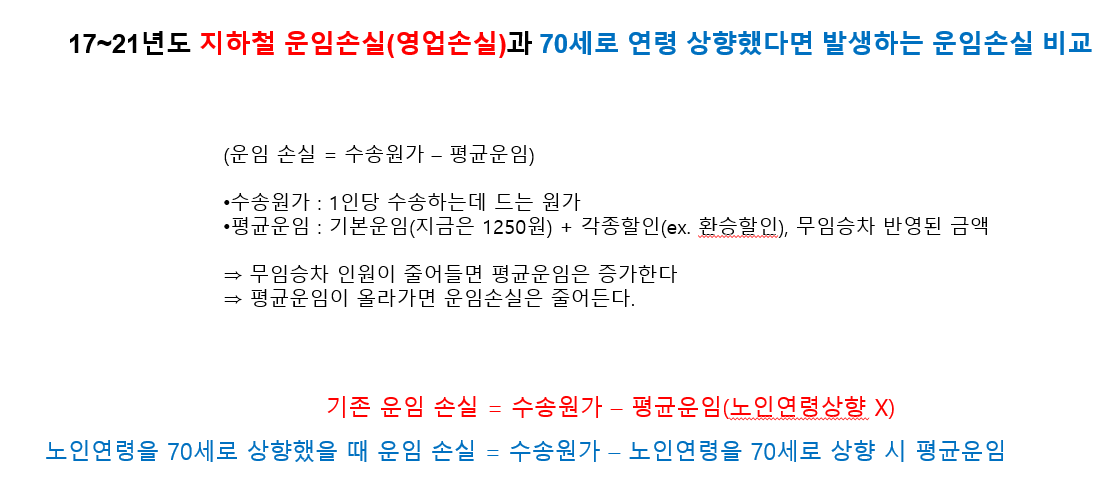

In [ ]:
dft.info()
dft.head(2)

In [ ]:
dft["운영기관"].unique()

In [ ]:
# 연도별 평균 수송원가 구하기

def yr_mean_carry(yr):
    dft_yr = dft[dft["연도"] == yr]
    yr_mean = dft_yr["수송원가 (원)"].mean()
    
    return yr_mean


# 17~21년 평균 수송원가 구하기

yr_mean_carry_list = []

for i in range(2017, 2022):
    yr_mean_carry_list.append(yr_mean_carry(i))

yr_mean_carry_list


# 데이터프레임 만들기

yr_carry2 = pd.DataFrame({'연도':yr, '수송원가(원)': yr_mean_carry_list})
yr_carry2

In [ ]:
yr_mean_fare = sub_fare.iloc[:, :-1]
yr_mean_fare

In [ ]:
# yr_carry2와 yr_mean_fare 데이터 병합

loss = pd.merge(yr_carry2, yr_mean_fare, on="연도")
loss

##### 기존 운임손실 구하기

In [ ]:
loss["기존운임손실(원)"] = loss["수송원가(원)"] - loss["평균운임(원)"]
loss

##### 노인연령 상향시 운임손실 구하기


In [ ]:
loss["노인연령 상향시 운임손실(원)"] = loss["수송원가(원)"] - loss["노인연령을 70세로 상향 시 평균 운임(원)"]
loss

In [ ]:
# 운임손실 변화량 컬럼 추가하기

loss2 = (loss["노인연령 상향시 운임손실(원)"] - loss["기존운임손실(원)"]) / loss["기존운임손실(원)"]
loss["운임손실 변화율(%)"] = round(loss2*100, 2)
loss

In [ ]:
# 시각화
# 참고 : https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

x = np.arange(len(loss["연도"]))
width=0.25
multiplier = 0

fig, ax = plt.subplots(constrained_layout=True)

for attribute, measurement in loss.iloc[:,4:6].items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('운임손실(원)')
ax.set_title('승객 1인당 기존 운임손실과 노인연령을 70세로 상향했을 때 운임손실 비교')
ax.set_xticks(x + width, loss["연도"])
ax.legend(loc='upper left', ncols=2)
ax.set_ylim(0, 1500)

plt.show()

In [ ]:
# matplotlib으로 운임손실 변화량 나타내기
loss2 = loss.set_index("연도")

In [ ]:
loss2.iloc[:, -1].plot.line(figsize=(10, 5), lw=0.9, rot=0)

In [ ]:
# seaborn으로 같은 시각화 해보기

loss_dcrs = sns.lineplot(x="연도", y="운임손실 변화율(%)", data=loss)
loss_dcrs.set_title("연도별 노인연령상향 시 운임손실 변화율")

##### 연간 운임 손실액 구하기

In [ ]:
loss

In [ ]:
df_merge

In [ ]:
# loss와 df_merge에서 필요한 컬럼만 추출

loss2 = loss[["연도", "기존운임손실(원)", "노인연령 상향시 운임손실(원)"]]
carry2 = df_merge[["연도", "수송인원(천명)"]]
display(loss2)
display(carry2)

In [ ]:
df_ls_cry = pd.merge(loss2, carry2, on="연도")
df_ls_cry

In [ ]:
df_ls_cry["수송인원(명)"] = df_ls_cry["수송인원(천명)"] * 1000
df_ls_cry

In [ ]:
# 운임손실*수송인원 => 해당 연도의 전체 운임손실액
# 연도별 운임손실*수송인원 구하기

# 기존 연간 운임손실액
df_ls_cry["기존 연간 운임손실액"] = df_ls_cry["수송인원(명)"] * df_ls_cry["기존운임손실(원)"]

# 노인연령상향 시 연간 운임손실액
df_ls_cry["노인연령상향 시 연간 운임손실액"] = df_ls_cry["수송인원(명)"] * df_ls_cry["노인연령 상향시 운임손실(원)"]

df_ls_cry

In [ ]:
df_ls_cry2 = df_ls_cry[["연도", "기존 연간 운임손실액", "노인연령상향 시 연간 운임손실액"]]
df_ls_cry2

In [ ]:
df_ls_cry2["기존 연간 운임손실액"] = df_ls_cry2["기존 연간 운임손실액"].map('{:,.0f}'.format) + "원"
df_ls_cry2["노인연령상향 시 연간 운임손실액"] = df_ls_cry2["노인연령상향 시 연간 운임손실액"].map('{:,.0f}'.format) + "원"
df_ls_cry2

In [ ]:
# 운임 손실액 변화율 구하기

ls_cry = (df_ls_cry["노인연령상향 시 연간 운임손실액"] - df_ls_cry["기존 연간 운임손실액"])/df_ls_cry["기존 연간 운임손실액"]
df_ls_cry2["연간 운임손실액 변화율(%)"] = round(ls_cry*100, 2)
df_ls_cry2

In [ ]:
# 시각화를 위해 단위 변경

df_ls_cry

In [ ]:
df_ls_cry3 = df_ls_cry[["연도", "기존 연간 운임손실액", "노인연령상향 시 연간 운임손실액"]]
df_ls_cry3

In [ ]:
# 조 단위로 변경

df_ls_cry3["기존 연간 운임손실액(조원)"] = round(df_ls_cry3["기존 연간 운임손실액"]/1E+12, 2)
df_ls_cry3["노인연령상향 시 연간 운임손실액(조원)"] = round(df_ls_cry3["노인연령상향 시 연간 운임손실액"]/1E+12, 2)
df_ls_cry3

In [ ]:
# 시각화
# 참고 : https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

x = np.arange(len(df_ls_cry3["연도"]))
width=0.25
multiplier = 0

fig, ax = plt.subplots(constrained_layout=True)

for attribute, measurement in df_ls_cry3.iloc[:,3:].items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_ylabel('연간운임손실액(조원)')
ax.set_title('기존 연간 운임손실액과 노인연령상향 시 연간 운임손실액 비교')
ax.set_xticks(x + width, df_ls_cry3["연도"])
ax.legend(loc='upper left', ncols=1, bbox_to_anchor=(0.5, 1))
plt.figure(figsize=(13, 7))

plt.show()

In [ ]:
# 연간 손실액 차이 구하기

df_ls_cry3["연간 손실액 변화량"] = df_ls_cry3["노인연령상향 시 연간 운임손실액"] - df_ls_cry3["기존 연간 운임손실액"]
df_ls_cry3

In [ ]:
df_ls_cry2

In [ ]:
df_ls_cry2["연간 손실액 변화량"] = df_ls_cry3["연간 손실액 변화량"].map('{:,.0f}'.format) + "원"
df_ls_cry2

In [ ]:
df_ls_cry2.drop(columns="연간 운임손실액 변화율(%)")

## 향후 5년간(22-26년) 무임승차 연령을 상향한다면 얼마나 수익이 생길까? 과연 유의미할까?

### 무임승차 연령을 올렸을 때 향후 5년간(22-26년) 1인당 운임비용 구하기

#### 85년~21년까지 평균 물가상승률 구하기

##### 물가상승지수 데이터 불러오기

In [ ]:
# 물가상승지수
cpi = pd.read_csv(url_cpi, encoding="cp949")

##### 전처리

In [ ]:
cpi.shape
cpi.info()

In [ ]:
cpi.tail()

In [ ]:
# '지출목적별' 컬럼에서 '07 교통'만 가져오기
cpi_trans = cpi[cpi["지출목적별"] == "07 교통"].reset_index(drop=True)
cpi_trans

In [ ]:
# tidy data 만들기

cpi_melt = pd.melt(cpi_trans, id_vars=['도시별', '지출목적별'], var_name='연도', value_name='물가지수')
cpi_melt

##### 물가상승률 구하기

In [ ]:
# 물가상승률 계산
cpi_melt["교통물가상승률"] = 0
for i in range(1, len(cpi_melt)):
    cpi_melt["교통물가상승률"].iloc[i] = ((cpi_melt["물가지수"].iloc[i] / cpi_melt["물가지수"].iloc[i-1])-1)*100

cpi_melt


##### 물가상승률 시각화

In [ ]:
cpi_melt.plot(x="연도", y = "교통물가상승률")

In [ ]:
# 평균 물가 상승률 구하기
# 예측이 어려우므로 . ..  평균을 곱해주겠음
cpi_up = cpi_melt["교통물가상승률"].mean()
cpi_up

#### 22-26년 승객 1인당 운임손실 예측하기

In [ ]:
# 승객 1인당 운임손실 현황
df_fare = pd.read_csv(url_deficit, encoding='cp949')
df_fare

##### 전처리

In [ ]:
# 컬럼명 변경
df_fare = df_fare.rename(columns = {"운영기관별(1)":"운영기관", "시점":"연도"})
df_fare.head()

In [ ]:
# '운영기관'에서 서울 지하철만 가져오기
df_fare["운영기관"].unique()

In [ ]:
seoul_subway = ['서울교통공사', '서울메트로 9호선㈜', '서울교통공사9호선운영부문', '우이 신설경전철(주)']
df_fare = df_fare[df_fare["운영기관"].isin(seoul_subway)]
df_fare

In [ ]:
# 데이터타입 변경
df_fare[["연도", "운임손실 (원)", "수송원가 (원)"]] = df_fare[["연도", "운임손실 (원)", "수송원가 (원)"]].astype("int")
df_fare.dtypes

##### 기존 수송원가, 평균운임 비용 변동률 구해보기

In [ ]:
# 데이터프레임 만들기
df_fare_seoul = pd.DataFrame({"연도" : [2017,2018,2019,2020,2021],
                       "운임손실(원)" : 0,
                       "수송원가(원)" : 0,
                        "평균운임(원)": 0})
df_fare_seoul.set_index("연도", inplace=True)

# 4개 지하철 합산 구하기
for yr in range(2017,2022):
    for col in range(len(df_fare)):
        if df_fare["연도"].iloc[col]==yr:
            df_fare_seoul["운임손실(원)"][yr] += df_fare["운임손실 (원)"].iloc[col]
            df_fare_seoul["수송원가(원)"][yr] += df_fare["수송원가 (원)"].iloc[col]
            df_fare_seoul["평균운임(원)"][yr] += df_fare["평균운임 (원)"].iloc[col]
    df_fare_seoul["운임손실(원)"][yr] /= 4
    df_fare_seoul["수송원가(원)"][yr] /= 4
    df_fare_seoul["평균운임(원)"][yr] /= 4

df_fare_seoul.round(2)

##### 향후 5년 운임비용 예측

2021년 데이터 * 물가상승률

In [ ]:
# 데이터프레임 만들기
f_fare = pd.DataFrame({"연도":[2022,2023,2024,2025,2026],
         "운임손실(원)" : 0,
         "수송원가(원)" : 0,
         "평균운임(원)" : 0,
         "기본운임(원)" : 1250,
         "운임손실 변화율(%)" : 0})

f_fare

In [ ]:
# 변동률의 평균 곱하여 상승폭 확인(기본 2022년 값 설정 : 21년값으로 초기화된 데이터에 물가상승률 고려 상향)
f_fare["수송원가(원)"].iloc[0] = df_fare_seoul["수송원가(원)"].iloc[0] * (1+cpi_up/100)
f_fare["평균운임(원)"] = df_fare_seoul["평균운임(원)"].iloc[0]
f_fare["운임손실(원)"].iloc[0] = f_fare["수송원가(원)"].iloc[0] - f_fare["평균운임(원)"].iloc[0]
f_fare

In [ ]:
# 23년도 이후 변동 구하기
for col in range(1, len(f_fare)):
    f_fare["수송원가(원)"].iloc[col] = f_fare["수송원가(원)"].iloc[col-1] * (1+cpi_up/100)
    f_fare["운임손실(원)"].iloc[col] = f_fare["수송원가(원)"].iloc[col] - f_fare["평균운임(원)"].iloc[col]

    
# 운임손실 변화율 구하기
for col in range(1,len(f_fare)):
    f_fare["운임손실 변화율(%)"].iloc[col] = (f_fare["운임손실(원)"].iloc[col] - f_fare["운임손실(원)"].iloc[col-1]) / f_fare["운임손실(원)"].iloc[col-1]

In [ ]:
f_fare

##### 노인인구수 변화 구하기


In [ ]:
pop = pd.read_csv(url_pop, encoding='cp949')

In [ ]:
pop.columns

In [ ]:
# 불필요 항목 제외
pop = pop.drop(columns=['시나리오별(1)', '시도별(1)', '성별(1)'])

In [ ]:
# 컬럼명 변경
pop = pop.rename(columns = {'연령별(1)':'연령대'})
pop.tail(10)

In [ ]:
# tidy data 만들기
pop_melt = pd.melt(pop, id_vars = "연령대", var_name ="연도", value_name="인구수")
pop_melt.tail(10)

In [ ]:
# 타입 확인 및 변경
pop_melt.dtypes
pop_melt["연도"] = pop_melt["연도"].astype("int")

In [ ]:
# 노인 연령 인구수 데이터프레임 만들기

el_pop = pd.DataFrame({"연도" : [2022,2023,2024,2025,2026], 
                      "노인인구수" : 0})
el_pop = el_pop.set_index(keys=["연도"], drop=True)

In [ ]:
el_pop

In [ ]:
for col in range(len(pop_melt)):
    if (pop_melt["연령대"].iloc[col] == '65 - 69세') | (pop_melt["연령대"].iloc[col] == '70 - 74세') | (pop_melt["연령대"].iloc[col] == '75 - 79세') | (pop_melt["연령대"].iloc[col] == '80세이상'):
        yr = pop_melt["연도"].iloc[col]
        el_pop.loc[yr]["노인인구수"] += pop_melt["인구수"].iloc[col]

In [ ]:
el_pop["전체인구수"] = 0
el_pop

In [ ]:
for col in range(len(pop_melt)):
    if pop_melt["연령대"].iloc[col] == "계":
        yr = pop_melt["연도"].iloc[col]
        el_pop["전체인구수"].loc[yr] = pop_melt["인구수"].iloc[col]

In [ ]:
el_pop

In [ ]:
# 노인 비율
el_pop["노인비율"] = 0
for col in range(len(el_pop)):
    el_pop["노인비율"].iloc[col] = el_pop["노인인구수"].iloc[col] / el_pop["전체인구수"].iloc[col]
    
el_pop

In [ ]:
# 65-70세 인구수 구하기
el_pop["65-70세 노인인구수"] = [1,2,3,4,5]

In [ ]:
for col in range(len(pop_melt)):
    if pop_melt["연령대"].iloc[col] == '65 - 69세':
        yr = pop_melt["연도"].iloc[col]
        el_pop["65-70세 노인인구수"].loc[yr] = float(pop_melt["인구수"].iloc[col])
        
el_pop

##### 평균운임에 노인 비율 적용하기

In [ ]:
f_fare_ch = f_fare.copy()

In [ ]:
for col in range(len(f_fare_ch)):
    f_fare_ch["평균운임(원)"].iloc[col] = f_fare_ch["평균운임(원)"].iloc[col] * (1 - el_pop["노인비율"].iloc[col])
    f_fare_ch["운임손실(원)"].iloc[col] = f_fare_ch["수송원가(원)"].iloc[col] - f_fare_ch["평균운임(원)"].iloc[col]
    
# 운임손실 변화율 구하기
for col in range(1,len(f_fare)):
    f_fare_ch["운임손실 변화율(%)"].iloc[col] = (f_fare_ch["운임손실(원)"].iloc[col] - f_fare_ch["운임손실(원)"].iloc[col-1]) / f_fare_ch["운임손실(원)"].iloc[col-1]
    
f_fare_ch["운임손실 변화율(%)"] = round(f_fare_ch["운임손실 변화율(%)"]*100, 2)

In [ ]:
f_fare_ch

In [ ]:
f_fare_ch.plot(x="연도", y=["운임손실(원)", "평균운임(원)"])
plt.xticks(f_fare_ch["연도"]);

#### 22-26년 70세 상향시 운임손실 예측하기

In [ ]:
# 65-70세 노인인구 수가 유임승차시 노인 비율에 변화 발생
# (노인인구수 - 65-70세 노인인구수) / 전체인구수 = 변화된 노인비율 
el_pop

##### 변화된 노인(70세이상)비율 구하기

In [ ]:
# 변화된 노인 비율
el_pop["변화된 노인비율"] = 0
for col in range(len(el_pop)):
    el_pop["변화된 노인비율"].iloc[col] = (el_pop["노인인구수"].iloc[col] - el_pop["65-70세 노인인구수"].iloc[col]) / el_pop["전체인구수"].iloc[col]
    
el_pop

##### 변화된 노인비율이 적용된 운임비용 구하기

In [ ]:
f_fare_ch2 = f_fare.copy()

In [ ]:
for col in range(len(f_fare_ch2)):
    f_fare_ch2["평균운임(원)"].iloc[col] = f_fare_ch2["평균운임(원)"].iloc[col] * (1 - el_pop["변화된 노인비율"].iloc[col])
    f_fare_ch2["운임손실(원)"].iloc[col] = f_fare_ch2["수송원가(원)"].iloc[col] - f_fare_ch2["평균운임(원)"].iloc[col]
    
        
# 운임손실 변화율 구하기
for col in range(1,len(f_fare_ch2)):
    f_fare_ch2["운임손실 변화율(%)"].iloc[col] = (f_fare_ch2["운임손실(원)"].iloc[col] - f_fare_ch2["운임손실(원)"].iloc[col-1]) / f_fare_ch2["운임손실(원)"].iloc[col-1]
    
f_fare_ch2["운임손실 변화율(%)"] = round(f_fare_ch2["운임손실 변화율(%)"]*100, 2)

In [ ]:
f_fare_ch2

In [ ]:
f_fare_ch

##### 시각화


In [ ]:
# 70세 상향시 예측 그래프
f_fare_ch2.plot(x="연도", y=["운임손실(원)", "평균운임(원)"])
plt.xticks(f_fare["연도"]);

# 65세 이상 노인 인구수 변화율 적용 예측 그래프
f_fare_ch.plot(x="연도", y=["운임손실(원)", "평균운임(원)"])
plt.xticks(f_fare["연도"]);

### 기본운임을 올렸을 때 향후 5년간(22-26년) 1인당 운임비용 구하기

- 기본운임 300원 인상 가정

#### 기본운임료 인상(+300원)시 예측

f_fare_chp = f_fare_ch.copy()

In [ ]:
f_fare_chp["변경된 기본운임(원)"] = f_fare_chp["기본운임(원)"]+300

##### 기본운임료 변화율이 적용된 운임비용 구하기

In [ ]:
# 기본운임 변화율 구하기
ch_ratio = f_fare_chp["변경된 기본운임(원)"][0] / f_fare_chp["기본운임(원)"][0]
ch_ratio

In [ ]:
# 기본운임 변화율 적용하기 (기존 평균운임 * 기본운임 변화율)
for col in range(len(f_fare_chp)):
    f_fare_chp["평균운임(원)"].iloc[col] = f_fare_chp["평균운임(원)"].iloc[col] * ch_ratio
    f_fare_chp["운임손실(원)"].iloc[col] = f_fare_chp["수송원가(원)"].iloc[col] - f_fare_chp["평균운임(원)"].iloc[col]

# 운임손실 변화율 구하기
for col in range(1,len(f_fare)):
    f_fare_chp["운임손실 변화율(%)"].iloc[col] = (f_fare_chp["운임손실(원)"].iloc[col] - f_fare_chp["운임손실(원)"].iloc[col-1]) / f_fare_chp["운임손실(원)"].iloc[col-1]
    
f_fare_chp["운임손실 변화율(%)"] = round(f_fare_chp["운임손실 변화율(%)"]*100, 2)

In [ ]:
f_fare_chp

##### 시각화

In [ ]:
f_fare_chp.plot(x="연도", y=["운임손실(원)", "평균운임(원)"])
plt.xticks(f_fare_chp["연도"]);

### 연령상향과 기본료 인상으로 인해 발생되는 수익예측

#### 향후 5년 승차수 구하기

##### 2017~2021년 승차인원비율 구하기

- 승차인원 비율 : 승차인원 / 전체 인구수 - 0~4세(운임측정불가)
- 해당년도 승차인원 : (해당년도 인구수 - 해당년도의 0~4세(운임측정불가)) * 승차인원 비율

###### 인구수 데이터 불러오기

In [ ]:
sl = pd.read_csv(url, encoding='cp949')

In [ ]:
# 불필요한 컬럼 제거
sl = sl.drop(columns=['시나리오별(1)', '시도별(1)', '성별(1)'], axis=1)

In [ ]:
# 컬럼명 바꾸기
sl = sl.rename(columns = {'연령별(1)':'연령대'})
sl

In [ ]:
# tidy data 만들기
sl_melt = pd.melt(sl, id_vars=['연령대'], var_name='연도', value_name='인구수')
sl_melt

In [ ]:
# 연도 타입 object -> int
sl_melt["연도"] = sl_melt["연도"].astype("int")
sl_melt

###### 연도별 인원 구하기
- 우선 17년으로 작업 후 21년까지 반복문 돌리기

In [ ]:
# 2017년 자료만 가져오기
sl_17 = sl_melt[sl_melt["연도"] == 2017]
sl_17

In [ ]:
# 2017년 인구 총 계
sl_17_total = (sl_17[sl_17["연령대"] == "계"]).iloc[0, -1]
display(sl_17[sl_17["연령대"] == "계"])
sl_17_total

In [ ]:
# 2017년 서울시 만 65세 ~ 69세 인구 수 구하기 ('소계' 이용)

sl_17_6569sum = (sl_17[sl_17["연령대"] == "65 - 69세"]).iloc[0, -1]
display(sl_17[sl_17["연령대"] == "65 - 69세"])
display(sl_17_6569sum)

In [ ]:
# 2017년 서울시 만 0-4세 인구 수 구하기 ('소계' 이용)

sl_17_6569sum = (sl_17[sl_17["연령대"] == "0 - 4세"]).iloc[0, -1]
display(sl_17[sl_17["연령대"] == "0 - 4세"])
display(sl_17_6569sum)

In [ ]:
# 총 계, 65-69세 인구수 구하는 함수

def sl_yr(yr):
    
    # 해당연도 데이터프레임만 가져오기
    sl_yr = sl_melt[sl_melt["연도"] == yr]
    
    # 해당연도의 전체 인구 수 가져오기
    sl_yr_total = (sl_yr[sl_yr["연령대"] == "계"]).iloc[0, -1]
    
    # 해당연도의 0-4세 인구 수 가져오기
    sl_yr_baby = (sl_yr[sl_yr["연령대"] == "0 - 4세"]).iloc[0, -1]
    
    # 해당연도의 65-69세 인구 수 가져오기
    sl_yr_elder = (sl_yr[sl_yr["연령대"] == "65 - 69세"]).iloc[0, -1]
    
    # 해당연도의 65세 이상 인구 수 가져오기
    sl_yr_elder_all = (sl_yr[sl_yr["연령대"] == "65 - 69세"]).iloc[0, -1]
    sl_yr_elder_all += (sl_yr[sl_yr["연령대"] == "70 - 74세"]).iloc[0, -1]
    sl_yr_elder_all += (sl_yr[sl_yr["연령대"] == "75 - 79세"]).iloc[0, -1]
    sl_yr_elder_all += (sl_yr[sl_yr["연령대"] == "80세이상"]).iloc[0, -1]
    
    return sl_yr_total, sl_yr_baby, sl_yr_elder, sl_yr_elder_all

In [ ]:
# 반복문 돌리기 -> 17 ~ 21년 데이터만 추출하기

yr_list = []

for i in range(2017, 2022):
    yr_list.append(sl_yr(i))
    
yr_list

In [ ]:
yr_list[0][0]

In [ ]:
# 데이터 프레임으로 만들기

yr_pop = pd.DataFrame({'연도':[2017, 2018, 2019, 2020, 2021],
                        '전체인구수': [yr_list[i][0] for i in range (5)],
                        '0-4세인구수': [yr_list[i][1] for i in range (5)],
                        '65-69세인구수' : [yr_list[i][2] for i in range (5)],
                        '노인인구수' : [yr_list[i][3] for i in range (5)],})
yr_pop

###### 승차인원 구하기

In [ ]:
# 승차인원
carry = pd.read_csv(url_carry, encoding="cp949") 

In [ ]:
# 서울만 승차인원 확인하기
carry_seoul = carry[carry["운영기관별(1)"] == '서울']
carry_seoul

In [ ]:
# 서울의 연도별 승차인원 구하기
yr_seoul_carry = pd.DataFrame({"연도":[2017, 2018, 2019, 2020, 2021], "승차인원(천명)":carry_seoul["승차인원 (천명/년)"].to_list()})
yr_seoul_carry["승차인원(천명)"] = yr_seoul_carry["승차인원(천명)"]*1000
yr_seoul_carry = yr_seoul_carry.rename(columns = {"승차인원(천명)":"승차인원"})

###### 승차인원 비율 구하기

* 전체인구수 에서 0-4세의 경우 승차인원으로 파악이 안되므로 제외
* carry_p_mn : 승차인원비율

In [ ]:
pop_1721["승차인원비율"] = pop_1721["승차인원"] / (pop_1721["전체인구수"] - pop_1721['0-4세인구수'])
pop_1721

In [ ]:
# 승차인원비율의 평균구하기
carry_p_mn = pop_1721["승차인원비율"].mean()
carry_p_mn

##### 2017~2021년의 무임승차비율 구하기

* 무임승차데이터프레임 : nomoney
* 노인 무임승차인원 비율 : 노인무임승차수 / 노인인구수
* 해당년도 노인 무임승차인원 : 해당년도 노인인구수 * 노인무임승차인원 비율

In [ ]:
# 대상별 무임승차, 무임비용
nomoney = pd.read_csv(url_nomoney, encoding="cp949")

In [ ]:
# 무임승차데이터에서 컬럼명 변경
nomoney = nomoney.rename(columns = {"운영기관별(1)":"운영기관", "시점":"연도", "대상별(1)":"대상"})

In [ ]:
# 무임승차데이터에서 '대상' 컬럼에서 '노인'만 가져오기
nm_elderly = nomoney[nomoney["대상"] == "노인"].reset_index(drop=True)
nm_elderly

In [ ]:
# 운영기관에서 서울 지하철 데이터만 가져오기
seoul_subway = ['서울교통공사', '서울메트로 9호선(주)', '서울교통공사9호선운영부문', '우이 신설경전철(주)']
nm_elderly = nm_elderly[nm_elderly["운영기관"].isin(seoul_subway)]
display(nm_elderly)
nm_elderly.dtypes

In [ ]:
# 연도를 입력하면 무임승차수 출력되는 함수

def yr_nm(yr):
    nm_yr = nm_elderly[nm_elderly["연도"] == yr]
    nm_sum = nm_yr["무임승차 (천명)"].sum()
    
    return nm_sum *1000

In [ ]:
yr_nm(2017),yr_nm(2018),yr_nm(2019)

###### 무임승차수 구하기

In [ ]:
# 인구수 데이터프레임에 연도별 노인무임승차수 컬럼 만들기
pop_1721["무임승차수"] = [yr_nm(yr) for yr in range(2017,2022)]
pop_1721

###### 무임승차비율 구하기

In [ ]:
# 무임승차비율 구하기 
# 무임승차비율 = 무임승차수 / 노인인구수
pop_1721["무임승차비율"] = pop_1721["무임승차수"] / pop_1721["노인인구수"] 
pop_1721

In [ ]:
# 무임승차인원비율의 평균구하기
old_carry_mn = pop_1721["무임승차비율"].mean()
old_carry_mn

##### 22-26 년도의 승차수 예측

* 해당연도의 승차인원 : (해당연도 인구수 - 아이 인구수) * 승차인원비율(carry_p_mn)
* 해당연도의 무임승차인원 : 해당연도 노인 수 * 무임승차비율(old_carry_mn)

###### 데이터 가져오기

In [ ]:
# 22-26년도 인구수 데이터 가져오기
pop_2226 = el_pop[['노인인구수','전체인구수','65-70세 노인인구수']]

In [ ]:
pop_melt

###### 22-26년 아이수 컬럼추가

In [ ]:
# 연도를 입력하면 0-4세 인구수 출력되는 함수

def yr_baby(yr):
    baby_yr = pop_melt[pop_melt["연도"] == yr]
    
     # 해당연도의 0-4세 인구 수 가져오기
    baby_pop = (baby_yr[baby_yr["연령대"] == "0 - 4세"]).iloc[0, -1]
    
    return baby_pop

In [ ]:
# 함수 잘 작동되는지 확인
yr_baby(2022)

In [ ]:
# 인구수 데이터프레임에 '0-4세인구수' 컬럼추가
pop_2226['0-4세인구수'] = [yr_baby(yr) for yr in range (2022,2027)]
pop_2226

###### 해당연도의 승차인원 컬럼추가

(해당연도 인구수 - 아이 인구수) * 승차인원비율(carry_p_mn)

In [ ]:
pop_2226['승차인원'] = (pop_2226['전체인구수'] - pop_2226['0-4세인구수']) * carry_p_mn

In [ ]:
pop_2226['승차인원'] = (pop_2226['전체인구수'] - pop_2226['0-4세인구수']) * carry_p_mn

#### 해당연도의 무임승차인원, 연령상향시 무임승차수 추가
해당연도의 무임승차인원 : 해당연도 노인 수 * 무임승차비율(old_carry_mn)

In [ ]:
pop_2226['무임승차인원'] = pop_2226['노인인구수'] * old_carry_mn

In [ ]:
pop_2226

In [ ]:
pop_2226['연령상향시 무임승차인원'] = (pop_2226['노인인구수'] - pop_2226['65-70세 노인인구수']) * old_carry_mn

In [ ]:
pop_2226

##### 승차인원, 무임승차인원 시각화

In [ ]:
# 기본 틀 만들기
fi, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# 필요 데이터 그리기
ax[0].plot(pop_2226.index, pop_2226["승차인원"], label="승차인원", marker = 'o', color ='b')
ax[1].plot(pop_2226.index, pop_2226["무임승차인원"], label="무임승차인원", marker = 'o', color ='y')

# x축 눈금설정
ax[0].set_xticks(pop_2226.index)
ax[1].set_xticks(pop_2226.index)

# 범례적용하기
ax[0].legend(loc='best')
ax[1].legend(loc='best')

# 그리드 그리기
ax[0].grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')
ax[1].grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')


In [ ]:
plt.plot(pop_2226.index, pop_2226["승차인원"], label="승차인원", marker = 'o', color ='b')
plt.plot(pop_2226.index, pop_2226["무임승차인원"], label="무임승차인원", marker = 'o', color ='y')
plt.xticks(pop_2226.index)

plt.xlabel('연도')
plt.ylabel('인원수')
plt.title('향후 승차수', fontsize=16)

# 범례 적용
plt.legend(loc='best')

# 그리드 그리기
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')

plt.show()

In [ ]:
# 바 데이터로 시각화
x_label = '연도'
x = pop_2226.index
y1 = [pop_2226["승차인원"].iloc[i] for i in range(5)]
y2 = [pop_2226["무임승차인원"].iloc[i] for i in range(5)]


# 넓이 지정
width = 0.35

# subplots 생성
fig, axes = plt.subplots()

# 넓이 설정
axes.bar(x - width/2, y1, width, alpha = 0.5)
axes.bar(x + width/2, y2, width, alpha = 0.8)

# ticks & label 설정
plt.xticks(x)
axes.set_xticklabels(x_label)
plt.ylabel('')

# title
plt.title('향후 5년 승차수 예측')

# legend
# plt.legend()

plt.show()

#### 상향 전후 운임손실 구하기

1인당 운임손실 * 승차인원

In [ ]:
# 상향전(노인:65세이상) 운임비용
f_fare_ch

In [ ]:
# 상향후(노인:65세이상) 운임손실값
f_fare_ch2

In [ ]:
pop_2226

In [ ]:
f_fare_ch["운임손실(원)"].iloc[0]

##### 연령상향 전 운임손실비용

In [ ]:
# 연령상향 전 총 운임손실비용
loss = pd.DataFrame({"연도" : [2022,2023,2024,2025,2026],
                     "운임손실(조원)": [(f_fare_ch["운임손실(원)"].iloc[i] * pop_2226["승차인원"].iloc[i] / 1e+12) for i in range(5)]})

In [ ]:
loss

##### 연령상향 후 운임손실비용

In [ ]:
# 연령상향 후 총 운임손실비용
loss_up = pd.DataFrame({"연도" : [2022,2023,2024,2025,2026],
                     "운임손실(조원)": [(f_fare_ch2["운임손실(원)"].iloc[i] * pop_2226["승차인원"].iloc[i] / 1e+12) for i in range(5)]})

In [ ]:
loss_up

##### 연령상향전후 운임손실차이 변화율

In [ ]:
# 연령상향 전후 운임손실차이
loss_dif = pd.DataFrame({"연도" : [2022,2023,2024,2025,2026],
                     "연령상향시(억원)": [((loss["운임손실(조원)"].iloc[i] - loss_up["운임손실(조원)"].iloc[i]) *10000) for i in range(5)]})

loss_dif

In [ ]:
# 연령상향시 운임손실차이 변화율
ratio = []
for i in range(5):
    ratio.append((loss_dif["연령상향시(억원)"].iloc[i] - loss_dif["연령상향시(억원)"].iloc[i-1])/loss_dif["연령상향시(억원)"].iloc[i-1])

loss_dif["연령상향시변화율(%)"] = ratio
loss_dif["연령상향시변화율(%)"] = round(loss_dif["연령상향시변화율(%)"]*100, 2)

# 이전년도 연령상향시 운임손실차액이 없는 2022년도 0처리
loss_dif["연령상향시변화율(%)"].iloc[0] = 0.0

In [ ]:
loss_dif

##### 시각화

In [ ]:
# 선그래프 그리기

plt.plot(loss["연도"], loss["운임손실(조원)"], label="상향전 운임손실비용", marker = 'o', color ='g')
plt.plot(loss_up["연도"], loss_up["운임손실(조원)"], label="상향후 운임손실비용", marker = 'o', color ='r')
plt.xticks(loss_up["연도"])

plt.xlabel('연도')
plt.ylabel("비용(조원)")
plt.title('노인연령 상향 전후 운임손실비용', fontsize=16)

# 범례 적용
plt.legend(loc='best')

# 그리드 그리기
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')

plt.show()

In [ ]:
# 바 그래프 그리기
bar_width = 0.35
alpha = 0.5

p1 = plt.bar(loss["연도"] - bar_width/2, loss["운임손실(조원)"], 
             bar_width, 
             color='b', 
             alpha=alpha,
             label="상향 전")

p2 = plt.bar(loss_up["연도"] + bar_width/2, loss_up["운임손실(조원)"], 
             bar_width, 
             color='r', 
             alpha=alpha,
             label="상향 후")

plt.title('노인연령 상향 전후 운임손실비용', fontsize=16)
plt.ylabel('비용(조원)', fontsize=12)
plt.xlabel('연도', fontsize=12)
plt.xticks(loss["연도"], fontsize=10)

plt.legend()

# 숫자 넣는 부분
for rect in p1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, round(height, 2), ha='center', va='bottom', size = 10)

for rect in p2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, round(height, 2), ha='center', va='bottom', size = 10)

plt.show()

#### 기본운임 인상시 운임손실 구하기

##### 기본운임 인상시 운임손실비용

In [ ]:
# 기본운임 인상시 총 운임손실비용
loss_f_up = pd.DataFrame({"연도" : [2022,2023,2024,2025,2026],
                         "운임손실(조원)": [(f_fare_chp["운임손실(원)"].iloc[i] * pop_2226["승차인원"].iloc[i] /1e+12) for i in range(5)]})

In [ ]:
loss_f_up

##### 기본운임 전후 운임손실차이

In [ ]:
# 기본운임 전후 운임손실차이
loss_dif["기본운임인상시(억원)"] = [((loss["운임손실(조원)"].iloc[i] - loss_f_up["운임손실(조원)"].iloc[i]) *10000) for i in range(5)]

In [ ]:
loss_dif

In [ ]:
# 기본운임인상시 운임손실변화율
ratio = []
for i in range(5):
    ratio.append((loss_dif["기본운임인상시(억원)"].iloc[i] - loss_dif["기본운임인상시(억원)"].iloc[i-1])/loss_dif["기본운임인상시(억원)"].iloc[i-1])

loss_dif["기본운임인상시변화율(%)"] = ratio
loss_dif["기본운임인상시변화율(%)"] = round(loss_dif["기본운임인상시변화율(%)"]*100,2)

# 이전년도 연령상향시 운임손실차액이 없는 2022년도 0처리
loss_dif["기본운임인상시변화율(%)"].iloc[0] = 0.0

In [ ]:
loss_dif

##### 기본운임 인상 전후 운임손실 시각화

In [ ]:
# 바 그래프 그리기
bar_width = 0.35
alpha = 0.5

p1 = plt.bar(loss["연도"] - bar_width/2, loss["운임손실(조원)"], 
             bar_width, 
             color='b', 
             alpha=alpha,
             label="인상 전")

p2 = plt.bar(loss_f_up["연도"] + bar_width/2, loss_f_up["운임손실(조원)"], 
             bar_width, 
             color='r', 
             alpha=alpha,
             label="인상 후")

plt.title('기본운임 인상 전후 운임손실비용', fontsize=16)
plt.ylabel('비용(조원)', fontsize=12)
plt.xlabel('연도', fontsize=12)
plt.xticks(loss["연도"], fontsize=10)

plt.legend()

# 숫자 넣는 부분
for rect in p1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, round(height, 2), ha='center', va='bottom', size = 10)

for rect in p2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, round(height, 2), ha='center', va='bottom', size = 10)

plt.show()

#### 연령상향 전후, 기본요금인상 전후 운임손실변화율 차이 시각화

In [ ]:
loss_dif

In [ ]:
# 선그래프 그리기

plt.plot(loss_dif["연도"], loss_dif[["연령상향시변화율(%)", "기본운임인상시변화율(%)"]], label = ["연령 상향시", "기본요금 인상시"], marker = 'o')
# plt.plot(loss_up["연도"], loss_up["운임손실"], label="상향후 운임손실비용", marker = 'o', color ='r')
plt.xticks(loss_dif["연도"])

plt.xlabel('연도')
plt.ylabel("퍼센트(%)")
plt.title('운임손실비용 차이 변화율', fontsize=16)

# 범례 적용
plt.legend(loc='best')

# 그리드 그리기
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')

plt.show()

#### 연령상향과 기본료 인상 운임비용 비교 시각화하기

In [ ]:
# 기본 틀 만들기
fig1, axs1 = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig2, axs2 = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

##### 노인연령상향시 운임비용

In [ ]:
# 노인연령상향시 운임비용 그래프 그리기
axs1[0].plot(f_fare_ch['연도'], f_fare_ch["운임손실(원)"], label="운임손실", marker = 'o')
axs1[0].plot(f_fare_ch['연도'], f_fare_ch["평균운임(원)"], label="평균운임", marker = 'o')
axs1[1].plot(f_fare_ch2['연도'], f_fare_ch2["운임손실(원)"], label="운임손실", marker = 'o')
axs1[1].plot(f_fare_ch2['연도'], f_fare_ch2["평균운임(원)"], label="평균운임", marker = 'o')

fig1

In [ ]:
# 그리드 그리기
axs1[0].grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')
axs1[1].grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')


# x축 눈금설정
axs1[0].set_xticks(f_fare_ch["연도"])
axs1[1].set_xticks(f_fare_ch["연도"])

fig1

In [ ]:
# 그래프의 이름 붙이기
axs1[0].set_title("노인연령 상향 전")
axs1[1].set_title("노인연령 상향 후")

# 범례적용하기
axs1[0].legend(loc='upper left')

# 축이름 설정
axs1[0].set_xlabel("연도")
axs1[1].set_xlabel("연도")
axs1[0].set_ylabel("1인당비용(원)")

# 기본 틀 제목 설정
fig1.suptitle("연령상향 전후 1인당 운임비용 예측", fontsize=15)

fig1

##### 기본운임상향시 운임비용

In [ ]:
# 필요 데이터 그리기
axs2[0].plot(f_fare_ch['연도'], f_fare_ch["운임손실(원)"], label="운임손실", marker = 'o')
axs2[0].plot(f_fare_ch['연도'], f_fare_ch["평균운임(원)"], label="평균운임", marker = 'o')
axs2[1].plot(f_fare_chp['연도'], f_fare_chp["운임손실(원)"], label="운임손실", marker = 'o')
axs2[1].plot(f_fare_chp['연도'], f_fare_chp["평균운임(원)"], label="평균운임", marker = 'o')

fig2

In [ ]:
# 그리드 그리기
axs2[0].grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')
axs2[1].grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')

# x축 눈금설정
axs2[0].set_xticks(f_fare_ch["연도"])
axs2[1].set_xticks(f_fare_chp["연도"])

fig2

In [ ]:
# 그래프의 이름 붙이기
axs2[0].set_title("기본요금")
axs2[1].set_title("300원인상")

# 범례적용하기
axs2[0].legend(loc='upper left')

# 축이름 설정
axs2[0].set_xlabel("연도")
axs2[1].set_xlabel("연도")
axs2[0].set_ylabel("1인당비용(원)")

# 기본 틀 제목 설정
fig2.suptitle("기본요금인상 전후 1인당 운임비용 예측", fontsize=15)

fig2

# 지하철 운영의 실질적인 문제

## 지하철 운영 적자의 진짜 원인은?

### 서울교통공사 재무제표 - 손익계산서 분석 

In [ ]:
# 2021년 손익계산서

is_data = pd.read_csv(url_2021, encoding="cp949")
# 서울교통공사까지 표기
is_21 = is_data[:5].copy()
# 불필요 행,열 삭제
is_21 = is_21.drop([2,3], axis=0)
is_21 = is_21.drop(["기관별(1)"], axis=1)
# 필요 데이터 컬럼 수집
is_21_data = is_21[["2021", "2021.7","2021.11","2021.22","2021.23", "2021.48", "2021.104"]].copy()
# 컬럼명 변경
is_21_data.columns = ['매출액', '운수사업수익', "매출원가", "매출총이익",
                      "판매비와 관리비",'영업이익', "당기순이익"]
# 불필요 행 삭제
is_21_data = is_21_data.drop([0,1], axis=0)
# 연도 추가
is_21_data["연도"] = 2021

is_21_data

In [ ]:
# 2017 ~ 2020 손익계산서 항목 생성 함수

def is_data_f(url, i):
    '''
    손익계산서에서 매출액, 운수수익, 매출원가, 매출총이익, 판관비, 영업손익, 당기손익을 표현하는 함수
    '''
    df = pd.read_csv(url, encoding="cp949")
    # 서울교통공사까지 표기
    df = df[:5].copy()
    # 불필요 행,열 삭제
    df = df.drop([2,3], axis=0)
    df = df.drop(["행정구역별(1)"], axis=1)
    # 필요 데이터 컬럼 수집
    df_data = df[[i, i+".1",i+".5", i+".27", i+".28", i+".52", i+".75"]].copy()
    # 컬럼명 변경
    df_data.columns = ['매출액', '운수사업수익', "매출원가", "매출총이익",
                      "판매비와 관리비",'영업이익', "당기순이익"]
    # 불필요 행 삭제
    df_data = df_data.drop([0,1], axis=0)
    # 연도 추가
    df_data["연도"] = i

    return df_data 

In [ ]:
# 2020년 손익계산서 산출
url_2020 = "https://raw.githubusercontent.com/LimSeungMin/AIS8_task/main/%EB%8F%84%EC%8B%9C%EC%B2%A0%EB%8F%84%EA%B3%B5%EC%82%AC_%EC%9E%AC%EB%AC%B4%EC%83%81%ED%83%9C%ED%91%9C_%EC%86%90%EC%9D%B5%EA%B3%84%EC%82%B0%EC%84%9C_2020.csv"
i = str(2020)
is_20_data = is_data_f(url_2020, i)

In [ ]:
# 2019년 손익계산서 산출
url_2019 = "https://raw.githubusercontent.com/LimSeungMin/AIS8_task/main/%EB%8F%84%EC%8B%9C%EC%B2%A0%EB%8F%84%EA%B3%B5%EC%82%AC_%EC%9E%AC%EB%AC%B4%EC%83%81%ED%83%9C%ED%91%9C_%EC%86%90%EC%9D%B5%EA%B3%84%EC%82%B0%EC%84%9C_2019.csv"
i = str(2019)
is_19_data = is_data_f(url_2019, i)

In [ ]:
# 2018년 손익계산서 산출
url_2018 = "https://raw.githubusercontent.com/LimSeungMin/AIS8_task/main/%EB%8F%84%EC%8B%9C%EC%B2%A0%EB%8F%84%EA%B3%B5%EC%82%AC_%EC%9E%AC%EB%AC%B4%EC%83%81%ED%83%9C%ED%91%9C_%EC%86%90%EC%9D%B5%EA%B3%84%EC%82%B0%EC%84%9C_2018.csv"
i = str(2018)
is_18_data = is_data_f(url_2018, i)

In [ ]:
# 2017년 손익계산서 산출
url_2017 = "https://raw.githubusercontent.com/LimSeungMin/AIS8_task/main/%EB%8F%84%EC%8B%9C%EC%B2%A0%EB%8F%84%EA%B3%B5%EC%82%AC_%EC%9E%AC%EB%AC%B4%EC%83%81%ED%83%9C%ED%91%9C_%EC%86%90%EC%9D%B5%EA%B3%84%EC%82%B0%EC%84%9C_2017.csv"
i = str(2017)
is_17_data = is_data_f(url_2017, i)

In [ ]:
# 병합
is_data = pd.concat([is_21_data, is_20_data, is_19_data, is_18_data, is_17_data])

In [ ]:
# 형변환
is_data["연도"] = is_data["연도"].astype(int)
is_data = is_data.sort_values(by=["연도"])
is_data["매출액"] = pd.to_numeric(is_data["매출액"], errors='coerce')
is_data["운수사업수익"] = pd.to_numeric(is_data["운수사업수익"], errors='coerce')
is_data["매출원가"] = pd.to_numeric(is_data["매출원가"], errors='coerce')
is_data["매출총이익"] = pd.to_numeric(is_data["매출총이익"], errors='coerce')
is_data["판매비와 관리비"] = pd.to_numeric(is_data["판매비와 관리비"], errors='coerce')
is_data["영업이익"] = pd.to_numeric(is_data["영업이익"], errors='coerce')
is_data["당기순이익"] = pd.to_numeric(is_data["당기순이익"], errors='coerce')

In [ ]:
# 컬럼 설명

# 기준 : 원
# 매출액 : 운영사업수익(운수사업수익 포함) + 수탁사업수익
# 운수사업수익 : 매출액 내 운수사업 수익(서울교통공사는 운수업)
# 매출총이익 : 매출액 - 매출원가
# 영업이익 : 매출총이익 - 판매비와 관리비
# 당기순이익 : 영업이익 + 영업 외 수익 - 영업 외 비용 - 법인세
# 영업이익률 = (영업이익/매출액) * 100

is_data = is_data.reset_index(drop=True)
is_data["영업이익률(%)"] = ((is_data["영업이익"] / is_data["매출액"]) * 100).round(2)

### 무임승차 데이터 분석

In [ ]:
# 데이터 불러오기
data_cal = pd.read_csv(url_cal, encoding="cp949")

In [ ]:
# 필요 데이터셋 정리
cal = data_cal[["시점", "계.1", "노인.1"]].copy()

# 컬럼명 변경 및 index 초기화
cal.columns = ["연도", "총_무임승차비용", "노인_무임승차비용"]
cal = cal.drop([0], axis=0)
cal = cal.reset_index(drop=True)

# 데이터 단위 변경(백만원 -> 원)
cal["연도"] = cal["연도"].astype(int)
cal = cal.sort_values(by=["연도"])
cal["총_무임승차비용"] = (cal["총_무임승차비용"].astype(float)) * 1000000
cal["노인_무임승차비용"] = (cal["노인_무임승차비용"].astype(float)) * 1000000

In [ ]:
# 데이터 병합
hy = is_data.merge(cal, on="연도", how="left")
#index 설정"연도"
hy = hy.set_index(["연도"])
hy

In [ ]:
# 그래프 출력 시 에러 무시
import warnings
warnings.filterwarnings("ignore")

# 그래프 그릴 때 한글 깨짐 방지 설정
import os

# Mac OS의 경우와 그 외 OS의 경우로 나누어 설정
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [ ]:
# 손익계산서 분석.
# 매출액, 매출원가, 매출총이익 비교
plt.plot(hy["매출액"], color='#E69F00', marker='o', label="매출액")
plt.plot(hy["매출원가"], color='#56B4E9',  marker='o', label="매출원가")
plt.plot(hy["매출총이익"], color='#009E73', marker='o', label="매출총이익")
plt.grid(True, axis='y')
plt.title('매출액, 매출원가, 매출총이익 비교')
plt.xlabel('연도')
plt.ylabel('금액')
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

In [ ]:
# 손익계산서 계정과목 분석
# 매출액, 영업이익, 당기순이익, 영업이익률

x = [2017, 2018, 2019, 2020, 2021]
y1= hy["매출액"]
y2= hy["영업이익"]
y3= hy["당기순이익"]
y4= hy["영업이익률(%)"]

ax1 = plt.subplot(2, 2, 1)               
plt.bar(x, y1, color='#E69F00', label="매출액")
plt.title('매출액')
plt.xlabel('연도')
plt.ylabel('금액')

ax2 = plt.subplot(2, 2, 2)              
plt.bar(x, y2, color='#56B4E9', label="영업이익")
plt.title('영업이익')
plt.xlabel('연도')
plt.ylabel('금액')

ax3 = plt.subplot(2, 2, 3)              
plt.bar(x, y3, color='#CC79A7', label="당기순이익")
plt.title('당기순이익')
plt.xlabel('연도')
plt.ylabel('금액')

ax4 = plt.subplot(2, 2, 4)              
plt.plot(x, y3,color='#009E73', marker='o', label="영업이익률" )
plt.title('영업이익률')
plt.xlabel('연도')
plt.ylabel('금액')


plt.tight_layout()
plt.show()

In [ ]:
# 손익계산서 계정과목 분석
# 매출액 대비 운수사업수익 비중 -> 5년간 감소 추세. 운수사업 이외 위탁&수탁&부대사업을 통한 수익 증가

t_rate= ((hy.운수사업수익 / hy.매출액) * 100).round(2)
x = [2017, 2018, 2019, 2020, 2021]
y1= hy["매출액"]
y5= hy["운수사업수익"]

plt.subplot(2, 1, 1)       
plt.bar(x, y1, color='#E69F00', label="매출액")
plt.bar(x, y5, color='#56B4E9', label="운수사업수익")
plt.title('매출액 & 운수사업수익 현황')
plt.rcParams['figure.figsize'] = (6, 3)
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('금액')

plt.subplot(2, 1, 2)              
plt.plot(t_rate, color='#CC79A7', marker='o', label="운수사업수익비중")
plt.title('운수사업수익 비중')
plt.rcParams['figure.figsize'] = (6, 3)
plt.xlabel('연도')
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.grid(True, axis='y')
plt.ylabel('비율(%)')

plt.tight_layout()
plt.show()

In [ ]:
# 왜 적자인가?
# 비용 분석
# 매출액, 매출원가, 판관비를 통해 비용 지출 현황 파악

hy_4 = hy[["매출액", "매출원가", "판매비와 관리비"]]
hy_4.plot(kind="barh", title="매출액, 매출원가, 판관비 비교")
plt.xlabel("금액")
plt.ylabel("연도")
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

In [ ]:
px.bar(hy_4, title="매출액, 매출원가, 판관비 현황")

In [ ]:
# 왜 적자인가?
# 매출액 대비 매출원가 비중 -> 코로나 시기 급 상승 이후 하락 추세이나, 지속적인 매출액 < 매출원가 상황.
t_rate2 = ((hy["매출원가"] / hy["매출액"]) * 100).round(2)
t_rate3 = ((hy["판매비와 관리비"] / hy["매출액"]) * 100).round(2)
x = [2017, 2018, 2019, 2020, 2021]

plt.subplot      
plt.plot(x, t_rate2, color='#E69F00', marker='o', label="매출원가 비중")
plt.plot(x, t_rate3, color='#56B4E9', marker='o', label="판관비 비중")
plt.title('매출액 대비 매출원가, 판관비 비중 현황')
plt.grid(True, axis='y')
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('연도')
plt.ylabel('금액')

plt.show()

### 가설설정

1. 무임승차액과 매출액은 상관이 있을 것이다.
2. 무임승차액과 영업이익은 상관이 있을 것이다.


In [ ]:
# 시각화를 위한 컬럼명 영어 변경
hy_e = hy.copy()
hy_e.columns = ['revenue_sales', 'revenue_transportation', "cost_of_sales", "gross_profit",
                "selling_expenses",'operating_income', "profit", "rate_operating_income", "total_free_ride", "senior_free_ride"]

In [ ]:
# n이 너무 작아 상관 계수 분석 불가.
hy_e.corr()

#### 무임승차액과 매출액은 상관이 있을것 이다

In [ ]:
# 귀무가설 : 총무임승차액은 매출액과 상관이 없다
# 대립가설 : 총무임승차액은 매출액과 상관이 있다

# p-val > 0.05   => 결론 유보
# n이 너무 작아 유의미한 결론 추론 불가
pg.corr(hy_e.total_free_ride, hy_e.revenue_sales)

In [ ]:
# 귀무가설 : 노인무임승차액은 운수사업수익과 상관이 없다
# 대립가설 : 노인무임승차액은 운수사업수익과 상관이 있다

# p-val > 0.05   => 결론 유보
# n이 너무 작아 유의미한 결론 추론 불가
pg.corr(hy_e.revenue_transportation, hy_e.senior_free_ride)

In [ ]:
# 매출액, 운수사업수익, 총_무임승차비용, 노인_무임승차비용 비교

t_rate= ((hy.운수사업수익 / hy.매출액) * 100).round(2)
x = [2017, 2018, 2019, 2020, 2021]
y1 = hy["매출액"]
y5 = hy["운수사업수익"]
y6 = hy["총_무임승차비용"]
y7 = hy["노인_무임승차비용"]
     
plt.bar(x, y1, color='#E69F00', label="매출액")
plt.bar(x, y5, color='#56B4E9', label="운수사업수익")
plt.bar(x, y6, color='#009E73', label="총_무임승차비용")
plt.bar(x, y7, color='#F0E442', label="노인_무임승차비용")
plt.title('무임승차액 & 매출액 현황')
plt.rcParams['figure.figsize'] = (6, 3)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('연도')
plt.ylabel('금액')

plt.tight_layout()
plt.show()

In [ ]:
# 운수사업수익 대비 노인무임승차비용 비중
y8 = ((hy["노인_무임승차비용"] / hy["운수사업수익"]) * 100).round(2)

plt.plot(y8, color='#CC97A7', marker='o', label="노인 무임승차")
plt.grid(True, axis='y')
plt.title('운수사업수익 대비 노인무임승차비용 비중')
plt.xlabel('연도')
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.ylabel('%')
plt.legend()

plt.show()

#### 무임승차액과 영업이익은 상관이 있을것이다.

In [ ]:
# 귀무가설 : 총_무임승차액은 영업이익과 상관이 없다
# 대립가설 : 총_무임승차액은 영업이익과 상관이 있다

# p-val > 0.05   => 결론 유보
# n이 너무 작아 유의미한 결론 추론 불가
pg.corr(hy_e.total_free_ride, hy_e.operating_income)

In [ ]:
# 귀무가설 : 노인무임승차액은 영업이익과 상관이 없다
# 대립가설 : 노인무임승차액은 영업이익과 상관이 있다

# p-val > 0.05   => 결론 유보
# n이 너무 작아 유의미한 결론 추론 불가
pg.corr(hy_e.senior_free_ride, hy_e.operating_income)

In [ ]:
hy_6 = hy[["매출액", "영업이익", "총_무임승차비용", "노인_무임승차비용"]]

hy_6.plot(kind="barh", title="무임승차액과 영업이익 비교")
plt.xlabel("금액")
plt.ylabel("연도")
plt.legend(bbox_to_anchor=(1, 1))

plt.show()

In [ ]:
# 매출액, 영업이익, 총_무임승차비용, 노인_무임승차비용 비교

t_rate= ((hy.운수사업수익 / hy.매출액) * 100).round(2)
x = [2017, 2018, 2019, 2020, 2021]
y1 = hy["매출액"]
y5 = hy["영업이익"]
y6 = hy["총_무임승차비용"]
y7 = hy["노인_무임승차비용"]
     
plt.bar(x, y1, color='#E69F00', label="매출액")
plt.bar(x, y5, color='#56B4E9', label="영업이익")
plt.bar(x, y6, color='#009E73', label="총_무임승차비용")
plt.bar(x, y7, color='#F0E442', label="노인_무임승차비용")
plt.title('무임승차액 & 영업이익 현황')
plt.rcParams['figure.figsize'] = (6, 3)
plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel('연도')
plt.ylabel('금액')

plt.tight_layout()
plt.show()

In [ ]:
hy[["영업이익", "노인_무임승차비용"]].plot(figsize=(10, 4), secondary_y="노인_무임승차비용")
plt.ylabel("금액")

##### 가설 검정 실패. 비모수 가정을 적용?

In [ ]:
# 비모수가정, mwu
pg.mwu(hy_e.total_free_ride , hy_e.operating_income)

In [ ]:
# 비모수가정, wilcoxon
pg.wilcoxon(hy_e.total_free_ride , hy_e.operating_income)

In [ ]:
# 켄달 분석 적용
pg.corr(hy_e.total_free_ride , hy_e.operating_income , method="kendall")

# 노인 무임승차의 긍정적인 측면

## 노인 무임승차 연령 상향의 불이익 

### 지역별 65세 인구 수 

In [ ]:
df_sub = pd.read_csv(url_sub,encoding='cp949')
df_sub.head()

In [ ]:
df_sub.info()

In [ ]:
# 시스템 환경에 따른 기본 폰트명을 반환하는 함수

def get_font_family() :
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    
    if system_name == 'Darwin' :
        font_family = 'AppleGothic'
    elif system_name == 'Windows' :
        font_family = "Malgun Gothic"
    else :
        #Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv
        
        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManger.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

#폰트설정
plt.rc("font", family = get_font_family())
#마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

#### 지역별 65세 인구 수 전처리하기

In [ ]:
# 불필요한 컬럼 제거
df_sub = df_sub.drop(columns=['성별', '세대구성별'], axis=1)
df_sub.head()

* 지역별 지하철 이용률 참고자료
* 2020년도_노인실태조사_보고서(보건복지부) -> 〈부표 Ⅲ-11-34〉 노인의 시･도별 외출할 때 주로 이용하는 교통수단

In [ ]:
# 컬럼명 바꾸기

df_sub = df_sub.rename(columns = {'행정구역별(시군구)':'지역', '시점':'연도'})
df_sub.head(2)

In [ ]:
df_sub['지하철 이용 노인수'] = df_sub['노인인구'] * df_sub['지하철 이용률']
df_sub.head()

## 경로무임승차제도 폐지 시 외부활동 자제인원 
* 지하철 경로무임승차제도 폐지 시 43.8%가 외부활동을 자제할 것으로 조사된 바 있음. 
* <노인 교통이용 요금제도 개선방안 연구: 지하철 무임승차를 중심으로> 참고

In [ ]:
df_sub['제도 폐지 시 외부활동 자제인원'] = df_sub['지하철 이용 노인수'] * 0.438
df_sub.head()

## 지역별 노인 자살생각자 수 / 자살 시도자 수 추정

In [ ]:
df_suicide = pd.read_csv(url_sui,encoding='cp949')
df_suicide.head()

In [ ]:
# 컬럼명 바꾸기

df_suicide = df_suicide.rename(columns = {'행정구역별(시군구)':'지역', '시점':'연도'})
df_suicide.head()

In [ ]:
df_suicide['자살 생각자 수'] = df_sub['노인인구'] * df_suicide['자살 생각률']
df_suicide.head()

In [ ]:
df_suicide['자살 시도자 수'] = df_suicide['자살 생각자 수'] * df_suicide['자살 시도율']
df_suicide.head()

In [ ]:
new_suicide = df_suicide.drop([0,1])
new_suicide.head()

In [ ]:
new_suicide.shape

### 지역별 실제 자살자 수

In [ ]:
suicide = pd.read_csv(url_suicide,encoding='cp949')
suicide.head(5)

In [ ]:
suicide = suicide.drop(columns=['사망원인별(104항목)', '성별'], axis=1)
suicide.head(15)

In [ ]:
suicide_65 = suicide[suicide["연령"] == '65세 이상'].reset_index()
suicide_65.head()

In [ ]:
suicide_65 = suicide_65.drop(columns=['index'], axis=1)
suicide_65.head()

In [ ]:
suicide_65.shape

In [ ]:
suicide_65 = suicide_65.rename(columns = {'시도별':'지역', '시점':'연도', '사망자수 (명)':'사망자수'})
suicide_65.head(2)

### 자살 시도자 중 자살 실현율 구하기

In [98]:
new_suicide['자살 실현율'] = suicide_65['사망자수'] / new_suicide['자살 시도자 수']
new_suicide.head()

NameError: name 'suicide_65' is not defined

### 지하철 경로무임승차제도 폐지에 따른 노인 자살 시도자 증가

In [ ]:
df_sub['지하철 경로무임승차제도 폐지에 따른 노인 자살 시도자 증가'] = df_sub['제도 폐지 시 외부활동 자제인원'] * df_sub['외부활동을 자제하게 될 인원의 자살시도 증가율']
df_sub.head()

In [ ]:
df_sub['지하철 무임승차 폐지를 가정할 때 발생하는 노인 자살실현'] = df_sub['지하철 경로무임승차제도 폐지에 따른 노인 자살 시도자 증가'] * new_suicide['자살 실현율']
df_sub.head()

### 자살에 따른 사회적 편익 산출

In [99]:
df_sub.fillna(0, inplace=True) 
df_sub = df_sub.drop([0,1])
df_sub.head()

NameError: name 'df_sub' is not defined

In [ ]:
df_sub = df_sub.copy().replace([np.inf], np.nan) # inf, -inf를 nan으로 대체
df_sub.fillna(0, inplace=True) 
df_sub.head(2)

In [ ]:
df_sub['지하철 무임승차 폐지를 가정할 때 발생하는 노인 자살실현'].sum()

In [ ]:
df_sub20 = df_sub[df_sub["연도"] == 2020]
df_sub20.head(2)

In [ ]:
df_sub21 = df_sub[df_sub["연도"] == 2021]
df_sub21.head(2)

In [ ]:
df_sub20['자살 사회비용 감소편익'] = df_sub20['지하철 무임승차 폐지를 가정할 때 발생하는 노인 자살실현'] * 409000000
df_sub20.head(2)

In [ ]:
df_sub21['자살 사회비용 감소편익'] = df_sub21['지하철 무임승차 폐지를 가정할 때 발생하는 노인 자살실현'] * 409000000
df_sub21.head(2)

In [ ]:
df_sub['자살 사회비용 감소편익'] = df_sub['지하철 무임승차 폐지를 가정할 때 발생하는 노인 자살실현'] * 409000000
df_sub

* 보건사회연구원에 따르면 자살의 경제적 손실 추산 결과 1인당 4억900만원의 비용이 발생한다.

* 출처 : 시사위크 http://www.sisaweek.com/news/articleView.html?idxno=202786
* https://www.yna.co.kr/view/AKR20230213114000530
* https://www.asiae.co.kr/article/2023021316401924763

In [ ]:
df_sub20['자살 사회비용 감소편익'].sum()

In [ ]:
df_sub21['자살 사회비용 감소편익'].sum()

* 2020년 노인 무임승차 폐지 시 노인의 자살 사회비용 감소편익은 525억 9720만원이다.
* 2021년 노인 무임승차 폐지 시 노인의 자살 사회비용 감소편익은 594억 4175만원이다.

## 노인의 우울증상 사회비용 감소편익

In [ ]:
df_dep = pd.read_csv(url_dep,encoding='cp949')
df_dep.info()

In [ ]:
df_dep

In [ ]:
df_dep['외부활동 적은 집단의평균 우울증세 경험률'] = df_dep['외부활동 적은 집단의평균 우울증세 경험률'].str.replace("%", "")
df_dep['외부활동 많은 집단의평균 우울증세 경험률'] = df_dep['외부활동 많은 집단의평균 우울증세 경험률'].str.replace("%", "")

In [ ]:
df_dep['외부활동 적은 집단의평균 우울증세 경험률'] = df_dep['외부활동 적은 집단의평균 우울증세 경험률'].astype('float64')
df_dep['외부활동 많은 집단의평균 우울증세 경험률'] = df_dep['외부활동 많은 집단의평균 우울증세 경험률'].astype('float64')

In [ ]:
df_dep['외부활동 적은 집단의평균 우울증세 경험률'] = df_dep['외부활동 적은 집단의평균 우울증세 경험률'] / 100
df_dep['외부활동 많은 집단의평균 우울증세 경험률'] = df_dep['외부활동 많은 집단의평균 우울증세 경험률'] / 100

In [ ]:
df_dep.head(2)

In [ ]:
df_dep.dtypes

In [ ]:
df_dep['우울증세 경험률 차이'] = df_dep['외부활동 적은 집단의평균 우울증세 경험률'] - df_dep['외부활동 많은 집단의평균 우울증세 경험률']
df_dep.head(5)

### 우울증세 경험률 차이 가설검정
* 가설 : 외부활동이 적은 집단과 외부활동이 많은 집단의 우울증세 경험확률 차이가 클 것이다.
* 귀무가설 : 두 집단의 평균에 우울증세 경험확률 차이가 존재하지 않는다.
* 대립가설 : 두 집단의 평균에 우울증세 경험확률 차이가 존재한다.

In [ ]:
import pingouin as pg
few = df_dep['외부활동 적은 집단의평균 우울증세 경험률']
many =  df_dep['외부활동 많은 집단의평균 우울증세 경험률']
pg.ttest(few, many, paired = True)

In [ ]:
df_sub20 = df_sub20.reset_index().drop(columns=['index'], axis=1)
df_sub21 = df_sub21.reset_index().drop(columns=['index'], axis=1)

In [ ]:
df_sub20 = df_sub20.drop([7])
df_sub21 = df_sub21.drop([7])

In [ ]:
df_sub20 = df_sub20.reset_index()
df_sub21 = df_sub21.reset_index()

In [ ]:
df_sub20 = df_sub20.drop(columns=['index'], axis=1)
df_sub21 = df_sub21.drop(columns=['index'], axis=1)

In [ ]:
df_sub20['경로무임승차 폐지 시 우울증세 증가 인원'] = df_sub20['제도 폐지 시 외부활동 자제인원'] * df_dep['우울증세 경험률 차이']
df_sub20.reset_index().drop(columns=['index'], axis=1).head(2)

In [ ]:
df_sub21['경로무임승차 폐지 시 우울증세 증가 인원'] = df_sub21['제도 폐지 시 외부활동 자제인원'] * df_dep['우울증세 경험률 차이']
df_sub21.head()

### 노인의 우울증상 사회비용 감소편익 산출
* 참고자료 : 건강보험 심사평가원 > 최근 5년(2017~2021년) 우울증과 불안장애 진료현황 분석
* 2020년 우울증 1인당 진료비 : 532,190원
* 2021년 우울증 1인당 진료비 : 564,712원

### 2020년 무임승차 폐지 시 우울증 사회비용 감소편익

In [ ]:
df_sub20['무임승차 폐지 시 우울증 감소편익'] = df_sub20['경로무임승차 폐지 시 우울증세 증가 인원'] * 532190
df_sub20.head(2)

In [ ]:
df_sub20['무임승차 폐지 시 우울증 감소편익'].sum() 

In [ ]:
df_sub21['무임승차 폐지 시 우울증 감소편익'] = df_sub21['경로무임승차 폐지 시 우울증세 증가 인원'] * 564712
df_sub21

In [ ]:
df_sub21['무임승차 폐지 시 우울증 감소편익'].sum() 

In [ ]:
df_sub_year = df_sub.groupby("연도").sum("지하철 이용 노인수").reset_index()
plt.plot(df_sub_year['연도'], df_sub_year["지하철 이용 노인수"], marker = 'o', markersize = 10, markerfacecolor = 'blue',
        linestyle = '-.')
plt.title("전국 연도별 지하철 이용 노인수")
plt.xticks([2020,2021])
plt.xlabel("연도")
plt.ylabel("지하철 이용 노인수")
plt.grid(axis = 'y')
plt.show()


# x라벨, y라벨


In [ ]:
df_sub_year = df_sub.groupby("연도").sum("제도 폐지 시 외부활동 자제인원").reset_index()
plt.plot(df_sub_year['연도'], df_sub_year["제도 폐지 시 외부활동 자제인원"], marker = 'o', markersize = 10, markerfacecolor = 'red',
        linestyle = '-.')
plt.title("전국 연도별 제도 폐지 시 외부활동 자제인원 노인수")
plt.xticks([2020,2021])
plt.xlabel("연도")
plt.ylabel("외부활동 자제인원 수")
plt.grid(axis = 'y')
plt.show()

* 전국에 제도 폐지 시 외부활동을 자제하겠다는 응답을 보인 노인수가 2020년보다 2021년에 더 많다.

In [ ]:
df_sub_year = df_sub.groupby("연도").sum("지하철 경로무임승차제도 폐지에 따른 노인 자살 시도자 증가").reset_index()
plt.plot(df_sub_year['연도'], df_sub_year["지하철 경로무임승차제도 폐지에 따른 노인 자살 시도자 증가"], marker = 'o', markersize = 10, markerfacecolor = 'yellow',
        linestyle = '-.')
plt.title("전국 지하철 무임승차 제도 폐지 시 증가한 자살 시도 노인")
plt.xticks([2020,2021])
plt.xlabel("연도")
plt.ylabel("자살 시도 증가수")
plt.grid(axis = 'y')
plt.show()

* 전국에 지하철 무임승차 제도 폐지 시 2020년보다 2021년에 자살 시도한 노인이 증가했다. 

In [ ]:
df_sub_year = df_sub.groupby("연도").sum("지하철 무임승차 폐지를 가정할 때 발생하는 노인 자살실현").reset_index()
plt.plot(df_sub_year['연도'], df_sub_year["지하철 무임승차 폐지를 가정할 때 발생하는 노인 자살실현"], marker = 'o', markersize = 10, markerfacecolor = 'green',
        linestyle = '-.')
plt.title("제도 폐지 시 자살을 실현할 노인의 수")
plt.xticks([2020,2021])
plt.xlabel("연도")
plt.ylabel("자살 실현 노인수")
plt.grid(axis = 'y')
plt.show()

* 제도 폐지 시 자살을 실현하는 노인 수를 추정한 결과 2020년보다 2021년에 더 많은 것으로 나타났다.

* 위 결과를 정리하면, 연도가 지남에 따라서 지하철을 무임으로 이용하는 노인이 점점 많아지고 있는 추세임을 확인했으며
* 지하철 무임승차를 폐지했을 때 외부활동을 자제하는 노인들이 많아짐에 따라, 
* 자살을 시도하거나 실제로 자살을 실현하는 노인의 수도 연도가 지나면서 증가하고 있음을 확인할 수 있었다.

In [ ]:
df_sub20_region = df_sub20.groupby("지역").sum("무임승차 폐지 시 우울증 감소편익").reset_index()
plt.plot(df_sub20_region['지역'], df_sub20_region["무임승차 폐지 시 우울증 감소편익"], marker = 'o', markersize = 10, markerfacecolor = 'green',
        linestyle = '-.')
plt.title("2020 무임승차 폐지 시 우울증 감소편익 ")
plt.grid(axis = 'y')
plt.xticks(rotation = 60)
plt.ylabel("우울증 감소편익")
plt.show()

In [ ]:
df_sub21_region = df_sub21.groupby("지역").sum("무임승차 폐지 시 우울증 감소편익").reset_index()
plt.plot(df_sub21_region['지역'], df_sub21_region["무임승차 폐지 시 우울증 감소편익"], marker = 'o', markersize = 10, markerfacecolor = 'blue',
        linestyle = '-.')
plt.title("2021 무임승차 폐지 시 우울증 감소편익")
plt.grid(axis = 'y')
plt.xticks(rotation = 60)
plt.ylabel("우울증 감소편익")
plt.show()

In [ ]:
df_sub20_region = df_sub20.groupby("지역").sum("자살 사회비용 감소편익").reset_index()
plt.plot(df_sub20_region['지역'], df_sub20_region["자살 사회비용 감소편익"], marker = 'o', markersize = 10, markerfacecolor = 'red',
        linestyle = '-.')
plt.title("2020 무임승차 폐지 시 자살 사회비용 감소편익")
plt.grid(axis = 'y')
plt.xticks(rotation = 60)
plt.ylabel("자살 사회비용 감소편익")
plt.show()

In [ ]:
df_sub21_region = df_sub21.groupby("지역").sum("자살 사회비용 감소편익").reset_index()
plt.plot(df_sub21_region['지역'], df_sub21_region["자살 사회비용 감소편익"], marker = 'o', markersize = 10, markerfacecolor = 'purple',
        linestyle = '-.')
plt.title("2021 무임승차 폐지 시 자살 사회비용 감소편익")
plt.grid(axis = 'y')
plt.xticks(rotation = 60)
plt.ylabel("자살 사회비용 감소편익")
plt.show()